In [ ]:
# %%

"""
.####.##.....##.########...#######..########..########
..##..###...###.##.....##.##.....##.##.....##....##...
..##..####.####.##.....##.##.....##.##.....##....##...
..##..##.###.##.########..##.....##.########.....##...
..##..##.....##.##........##.....##.##...##......##...
..##..##.....##.##........##.....##.##....##.....##...
.####.##.....##.##.........#######..##.....##....##...
"""
import os
import pathlib
import mujoco
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import measure
from scipy.ndimage import binary_fill_holes

In [ ]:

# %%
"""
.##.....##.##.....##.......##..#######...######...#######.
.###...###.##.....##.......##.##.....##.##....##.##.....##
.####.####.##.....##.......##.##.....##.##.......##.....##
.##.###.##.##.....##.......##.##.....##.##.......##.....##
.##.....##.##.....##.##....##.##.....##.##.......##.....##
.##.....##.##.....##.##....##.##.....##.##....##.##.....##
.##.....##..#######...######...#######...######...#######.
"""

# os.chdir(os.path.dirname(__file__))
notebook_path = pathlib.Path().resolve()
print(notebook_path)
MODEL_XML_PATH = notebook_path / "../../mujoco/arm.xml"
MODEL_XML_PATH = notebook_path / "../../mujoco/arm_with_pulley.xml"
MODEL_XML_PATH = str(MODEL_XML_PATH.resolve())  # convert to string
display(MODEL_XML_PATH)

# MODEL_XML_PATH = "../../mujoco/arm.xml"
# display(MODEL_XML_PATH)
model = mujoco.MjModel.from_xml_path(MODEL_XML_PATH)
data = mujoco.MjData(model)

num_actuators = model.nu
hand_id = model.geom("hand").id
elbow_joint_id = model.joint("elbow").id

dur2run = 3600  # seconds
time_data = []
hand_position_data = {
    "x": [],
    "y": [],
    "z": [],
}

elbow_torque_data = []

sensor_data = {
    "deltoid_length": [],
    "latissimus_length": [],
    "biceps_length": [],
    "triceps_length": [],
    "deltoid_velocity": [],
    "latissimus_velocity": [],
    "biceps_velocity": [],
    "triceps_velocity": [],
    "deltoid_force": [],
    "latissimus_force": [],
    "biceps_force": [],
    "triceps_force": [],
}

ctrl_increment = 0.05

# Launch mujoco viewer
with mujoco.viewer.launch_passive(m, d, key_callback=key_callback) as viewer:

  # Enable wireframe rendering of the entire scene.
  viewer.user_scn.flags[mujoco.mjtRndFlag.mjRND_WIREFRAME] = 1
  viewer.sync()


# Simulate and save data
mujoco.mj_resetData(model, data)
while data.time < dur2run:
    mujoco.mj_step(model, data)

    # Random actuator control
    data.ctrl[:] = np.clip(
        data.ctrl + np.random.randn(num_actuators) * ctrl_increment, 0, 1
    )

    # Store time data
    time_data.append(data.time)

    # Store sensor data
    for i, key in enumerate(sensor_data.keys()):
        sensor_data[key].append(data.sensordata[i])

    # Store hand position data
    hand_position = data.geom_xpos[hand_id].copy()
    for i, key in enumerate(hand_position_data.keys()):
        hand_position_data[key].append(hand_position[i])

    # Store elbow torque data
    elbow_torque_data.append(data.qfrc_actuator[elbow_joint_id])



/Users/joseph/Documents/GitHub/animat/src/mujoco_rnn_cmaes_mj


'/Users/joseph/Documents/GitHub/animat/mujoco/arm.xml'

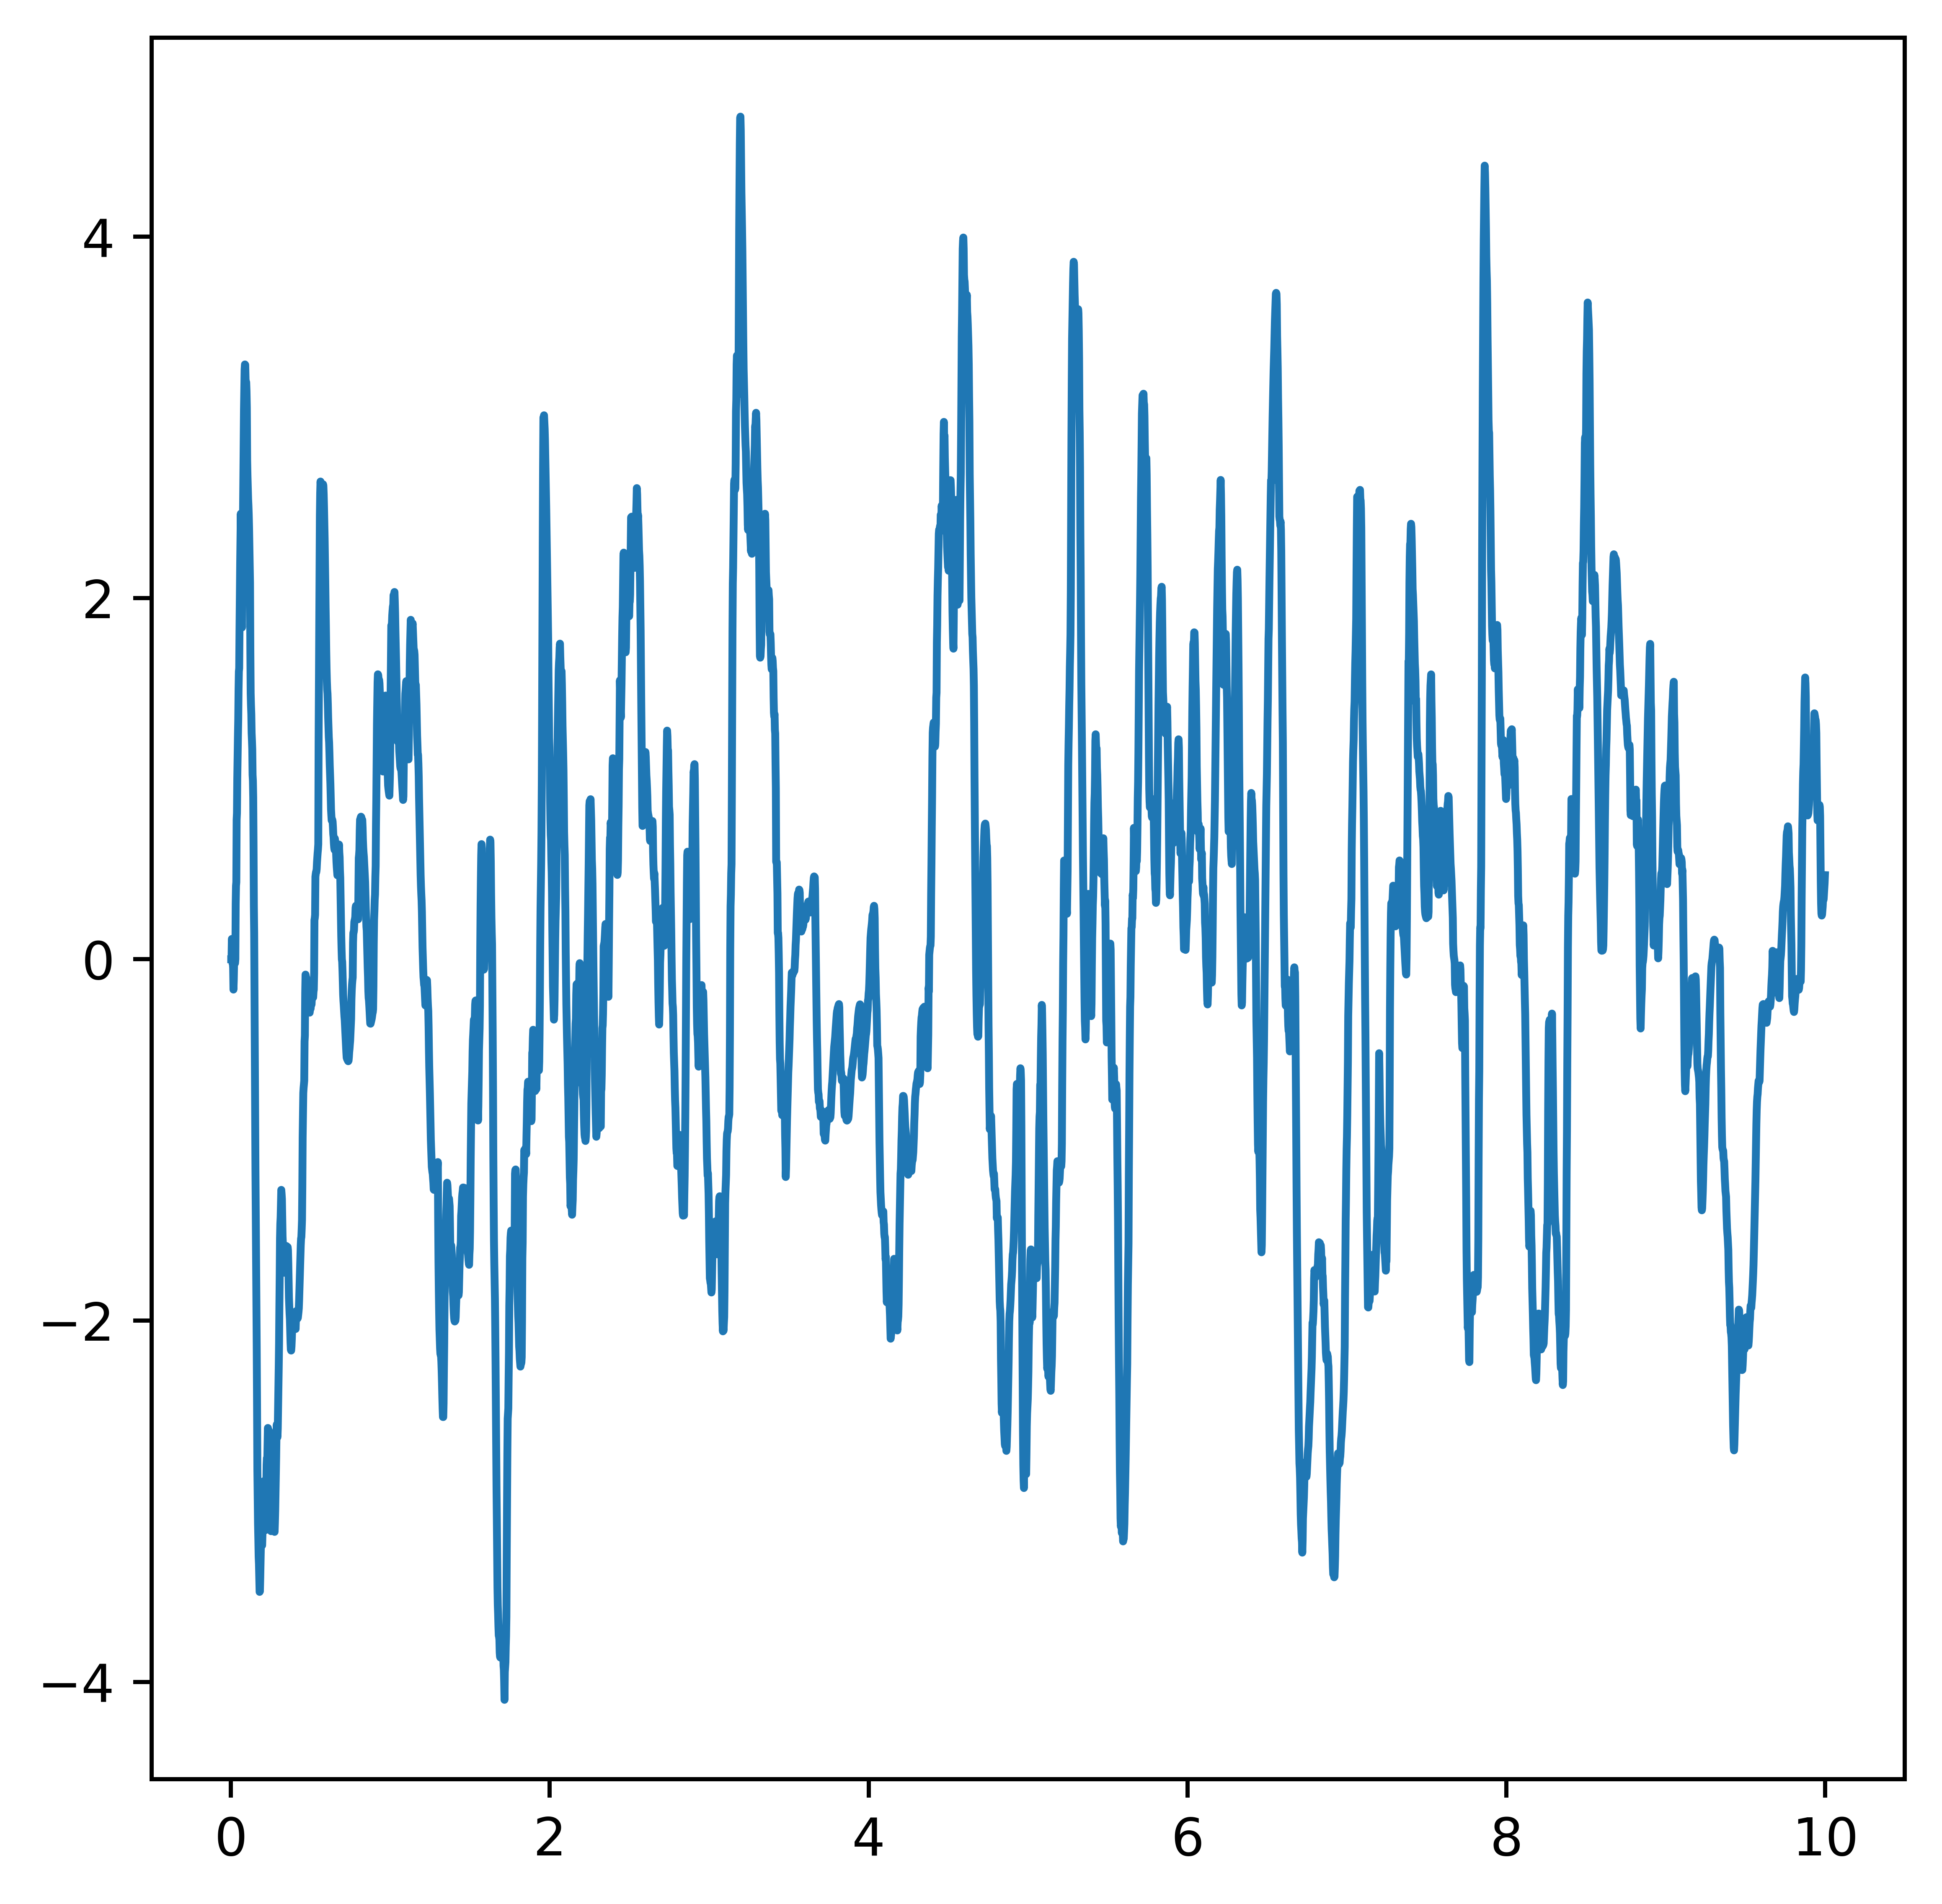

In [23]:
# Look at elbow torques

# Project defaults
plt.rcParams['figure.dpi'] = 900  # Set to your desired DPI value

# Determine the index up to which to plot
dur2plot = min(10, dur2run)
idcs2plot = np.searchsorted(time_data, dur2plot)

plt.figure(figsize=(6, 6))
plt.plot(time_data[:idcs2plot],elbow_torque_data[:idcs2plot])


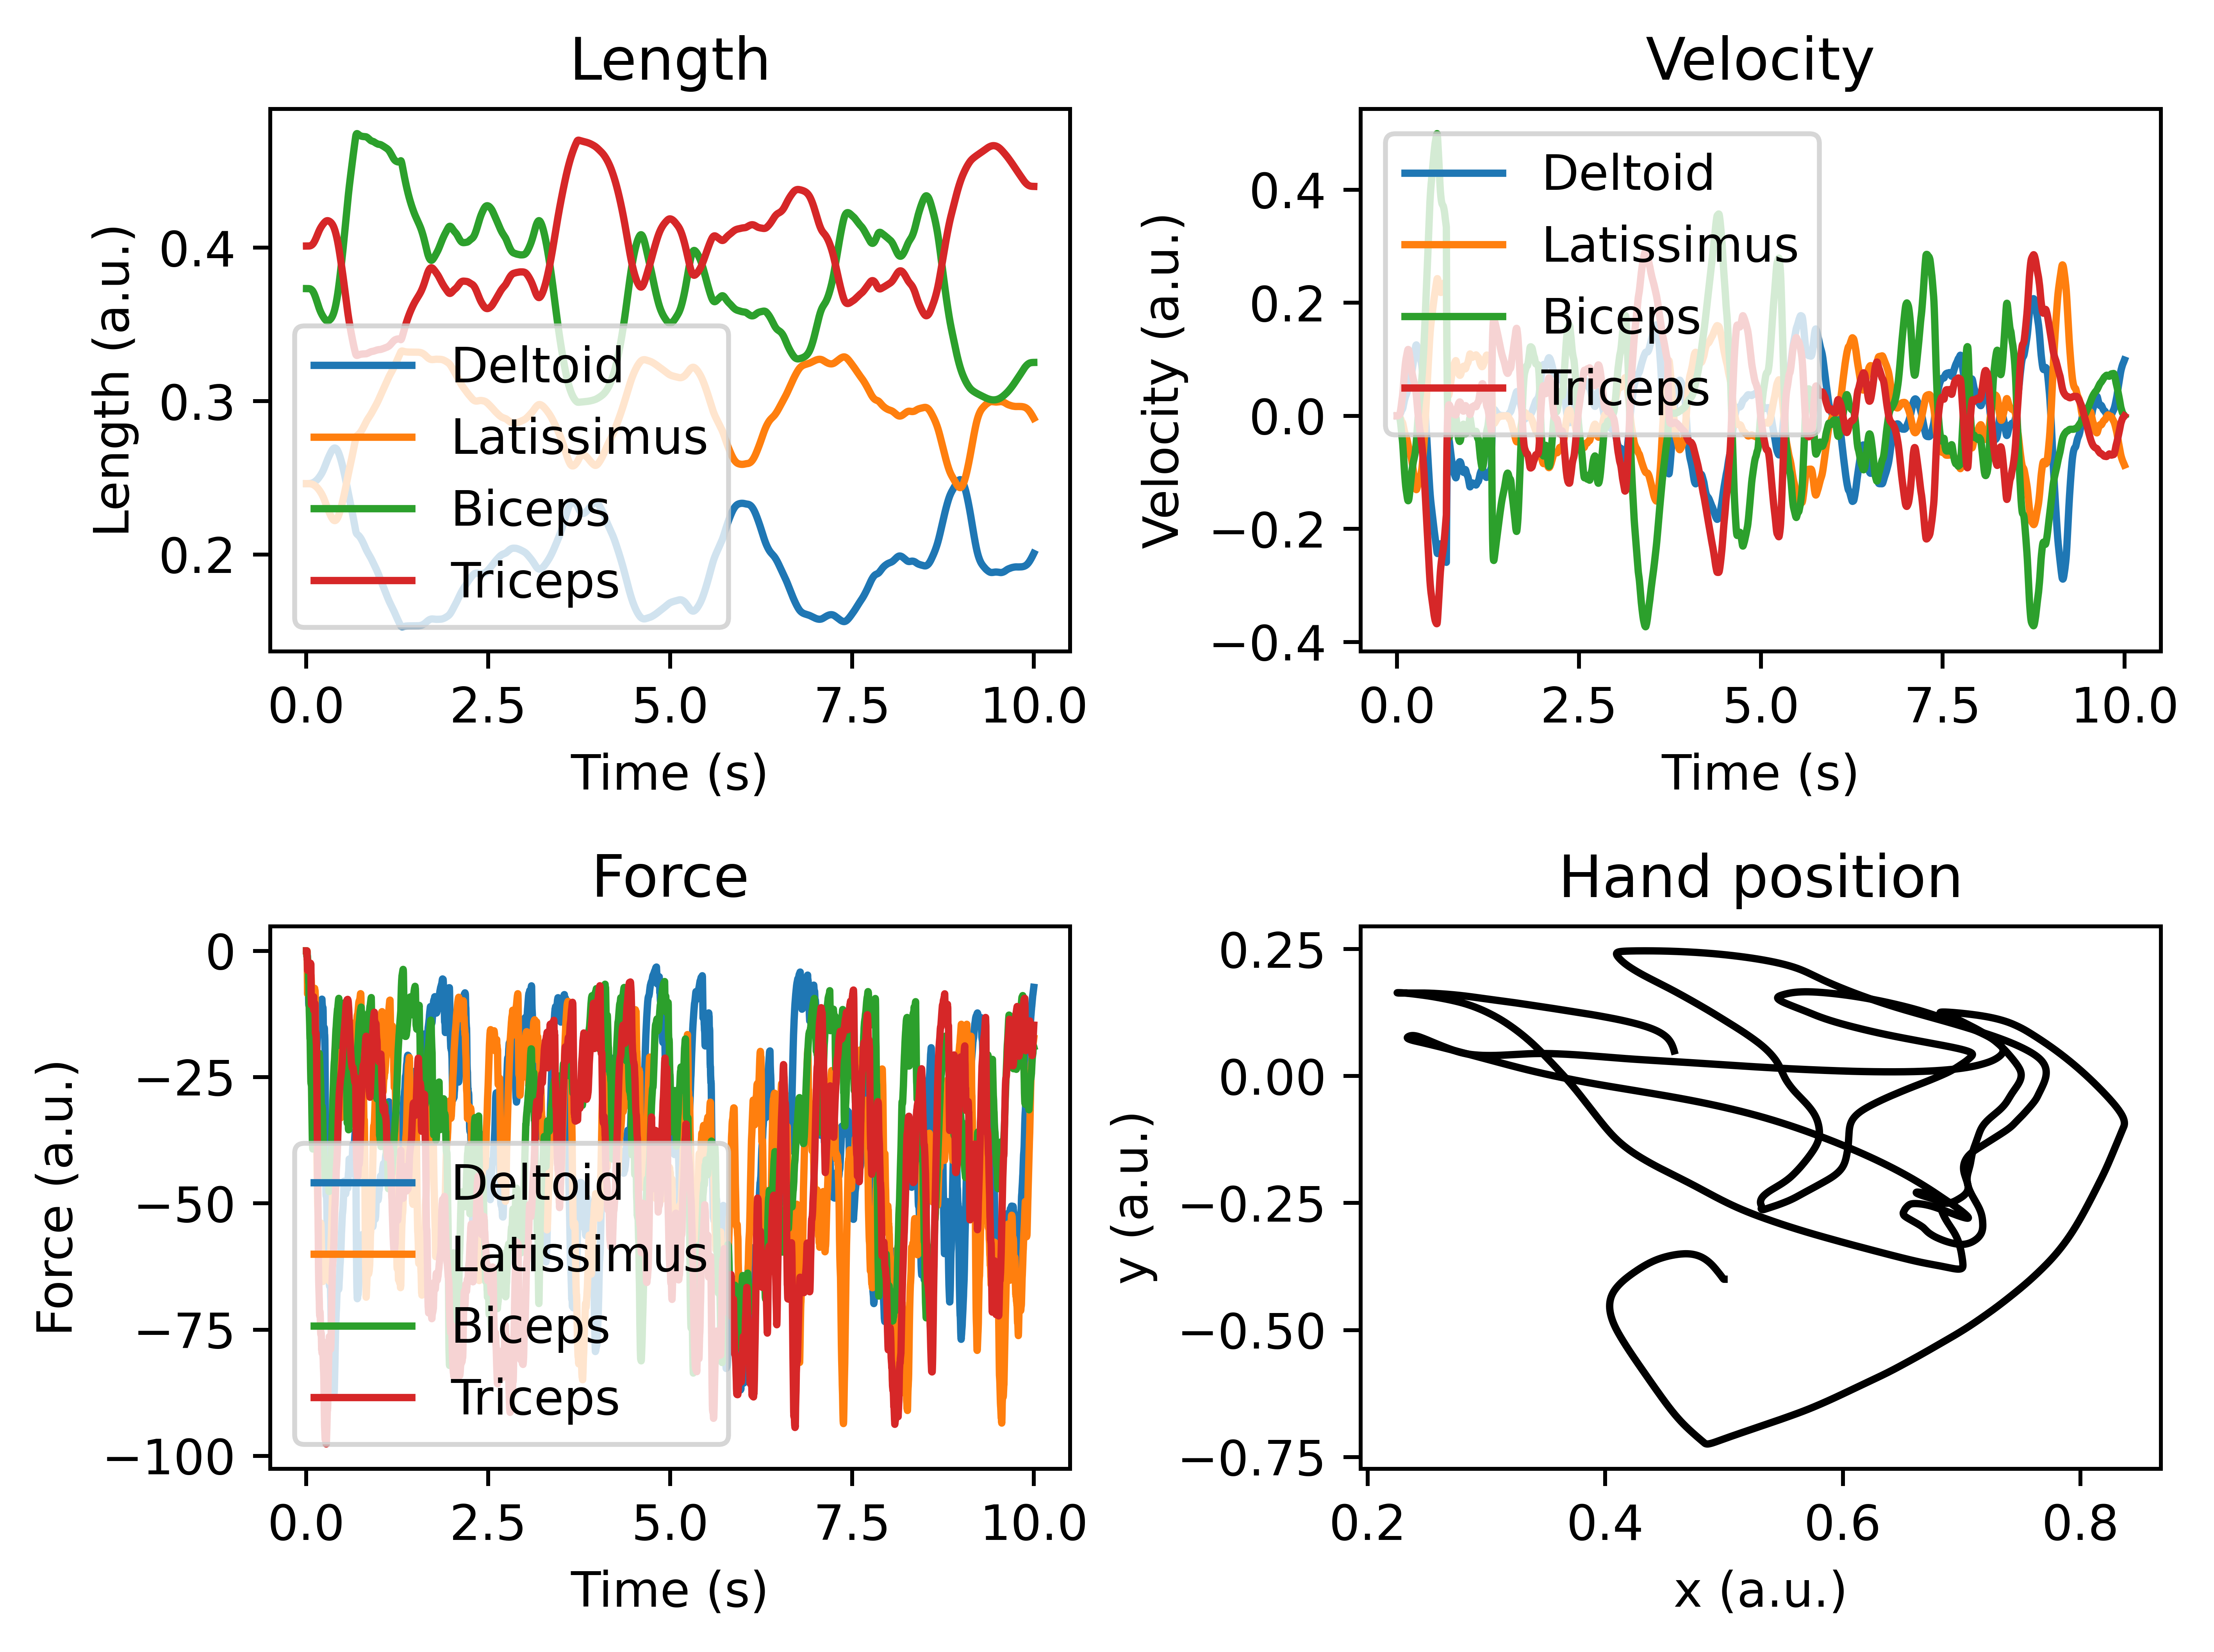

                            min       max       mean        std
deltoid_length         0.152193  0.333436   0.243164   0.056913
latissimus_length      0.152285  0.333551   0.245443   0.056829
biceps_length          0.299122  0.475397   0.363512   0.045215
triceps_length         0.329297  0.470655   0.410557   0.036027
deltoid_velocity      -0.446604  0.439578   0.000025   0.106877
latissimus_velocity   -0.429118  0.445728  -0.000027   0.106731
biceps_velocity       -0.483661  0.606985   0.000055   0.131585
triceps_velocity      -0.424176  0.375640  -0.000002   0.103986
deltoid_force       -116.074900  0.000000 -42.696662  21.630327
latissimus_force    -112.397670  0.000000 -42.671553  21.508572
biceps_force        -114.548279  0.000000 -37.459277  17.700039
triceps_force       -115.592130  0.000000 -43.503157  21.820027
        min       max      mean       std
x -0.607611  0.850695  0.355215  0.245509
y -0.872907  0.308962 -0.270633  0.317348
z  0.000000  0.000000  0.000000  0.000000


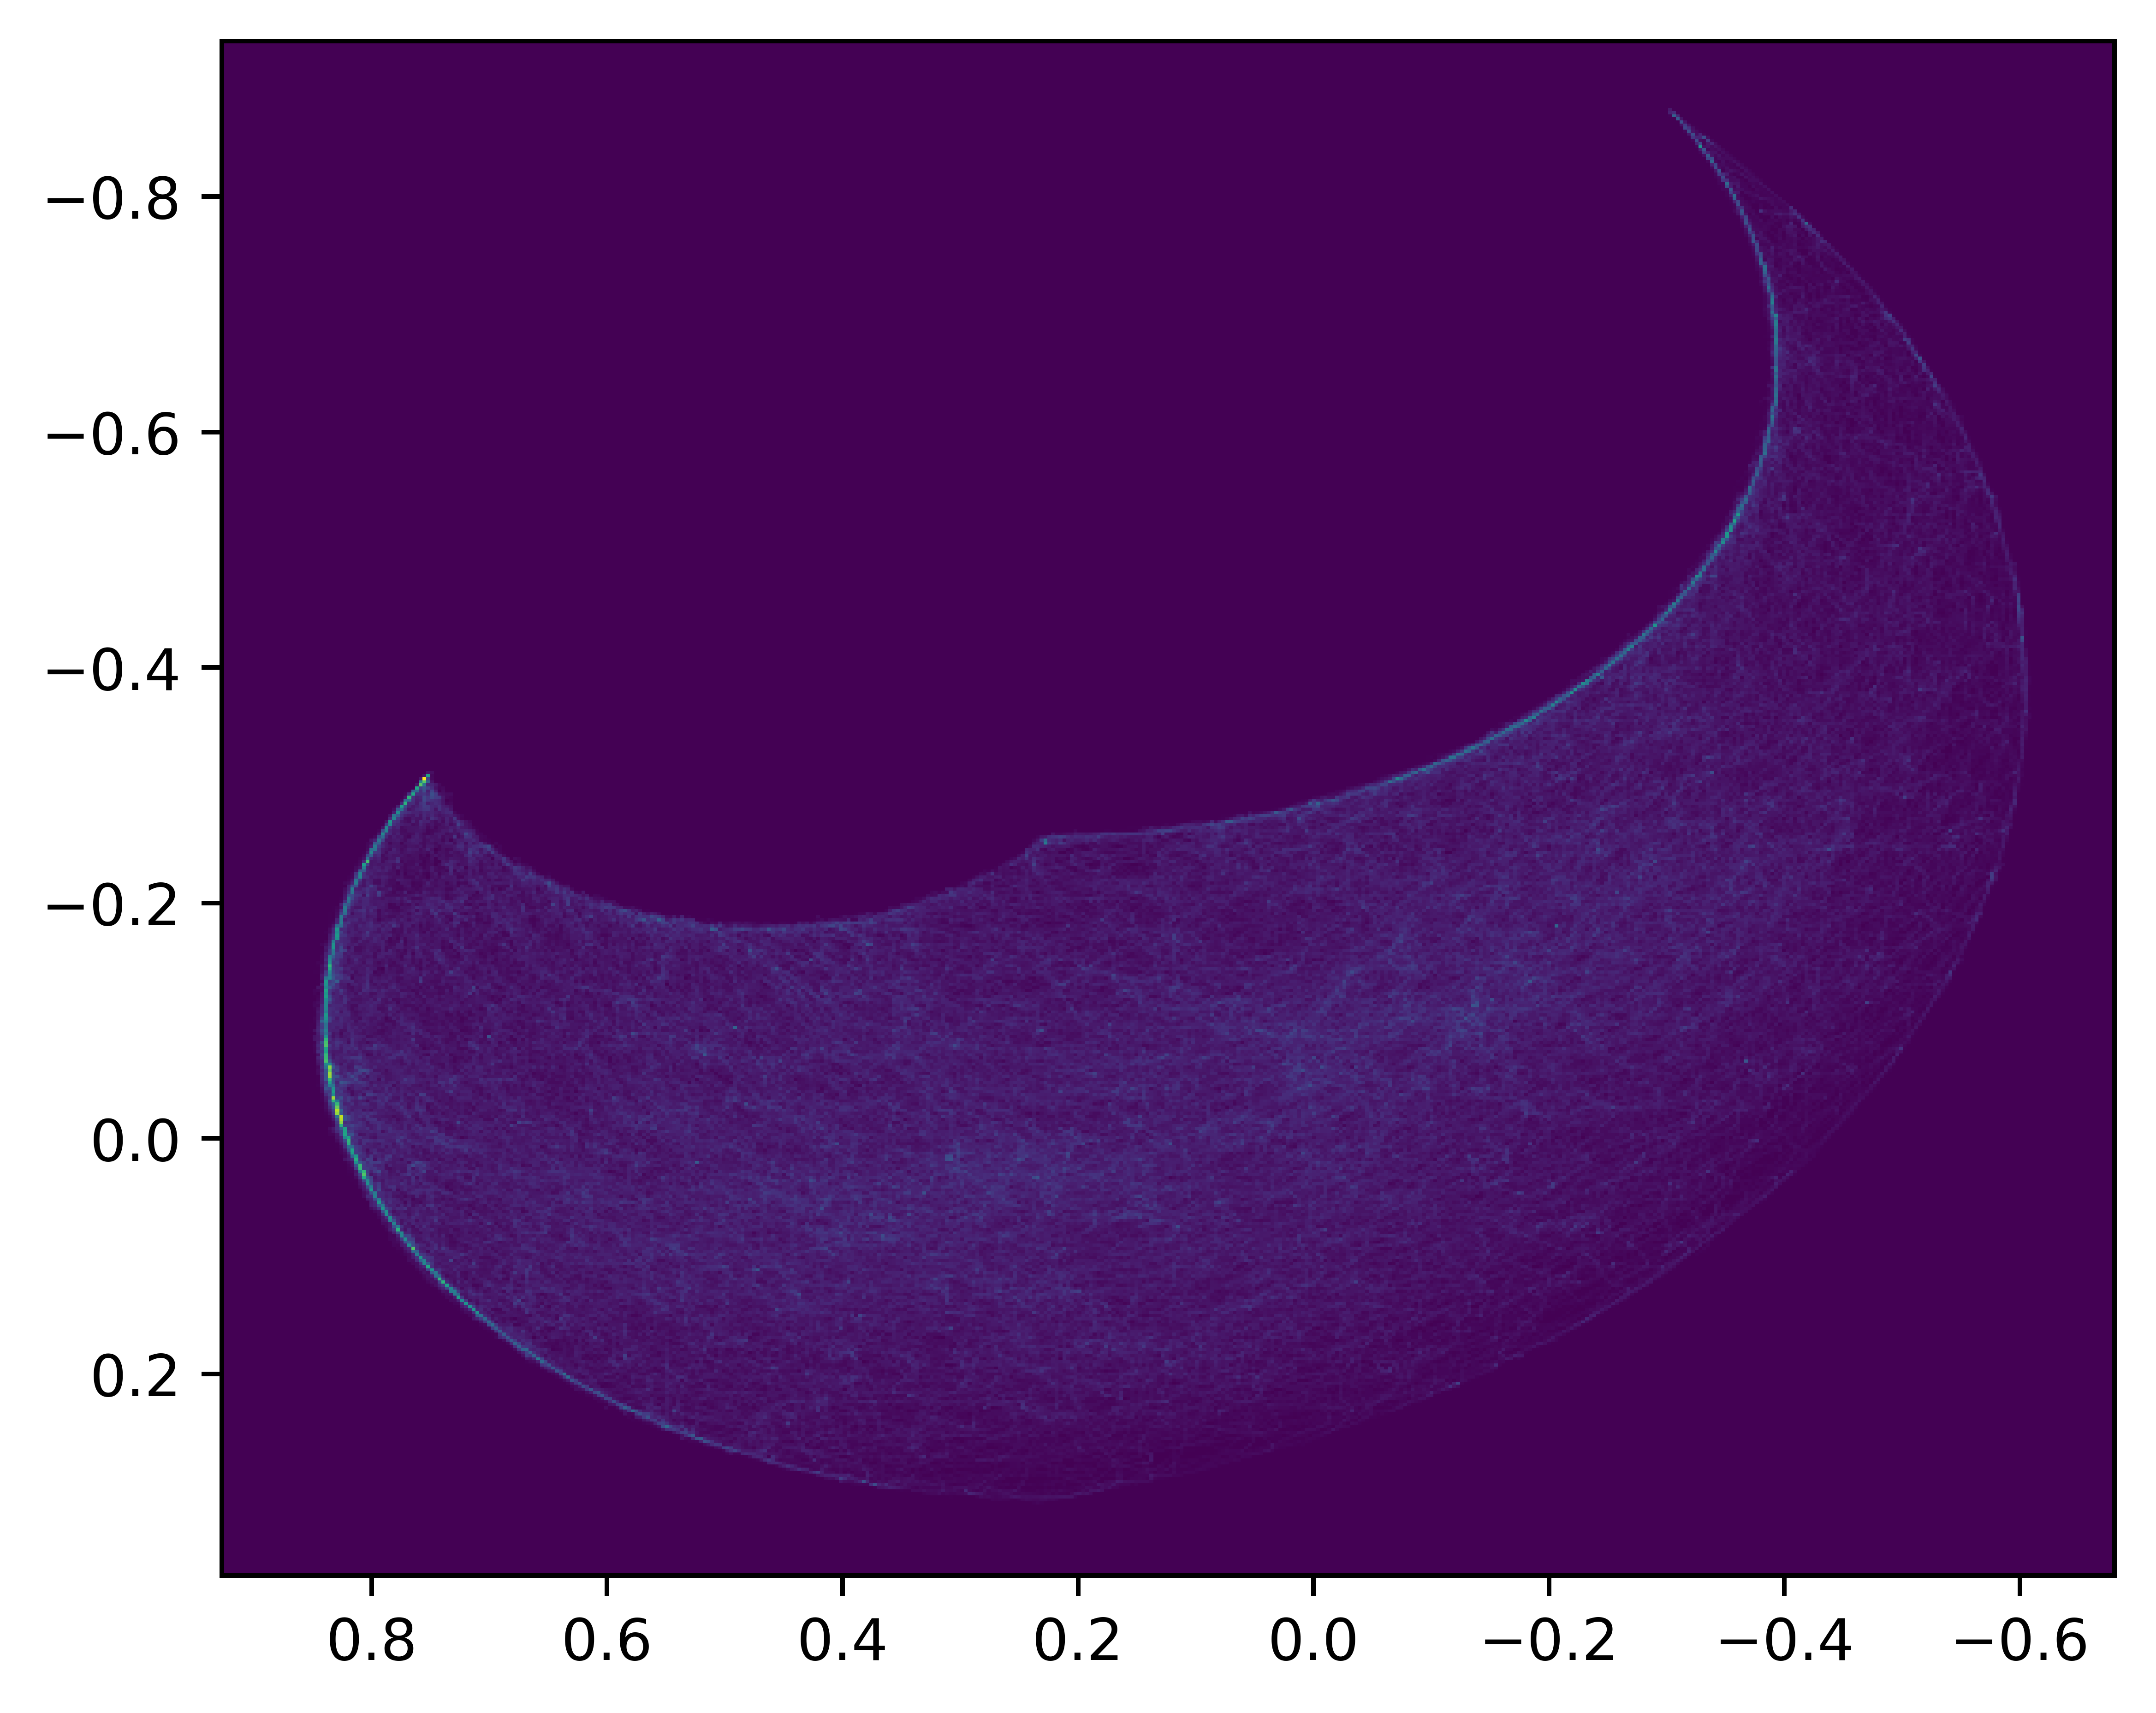

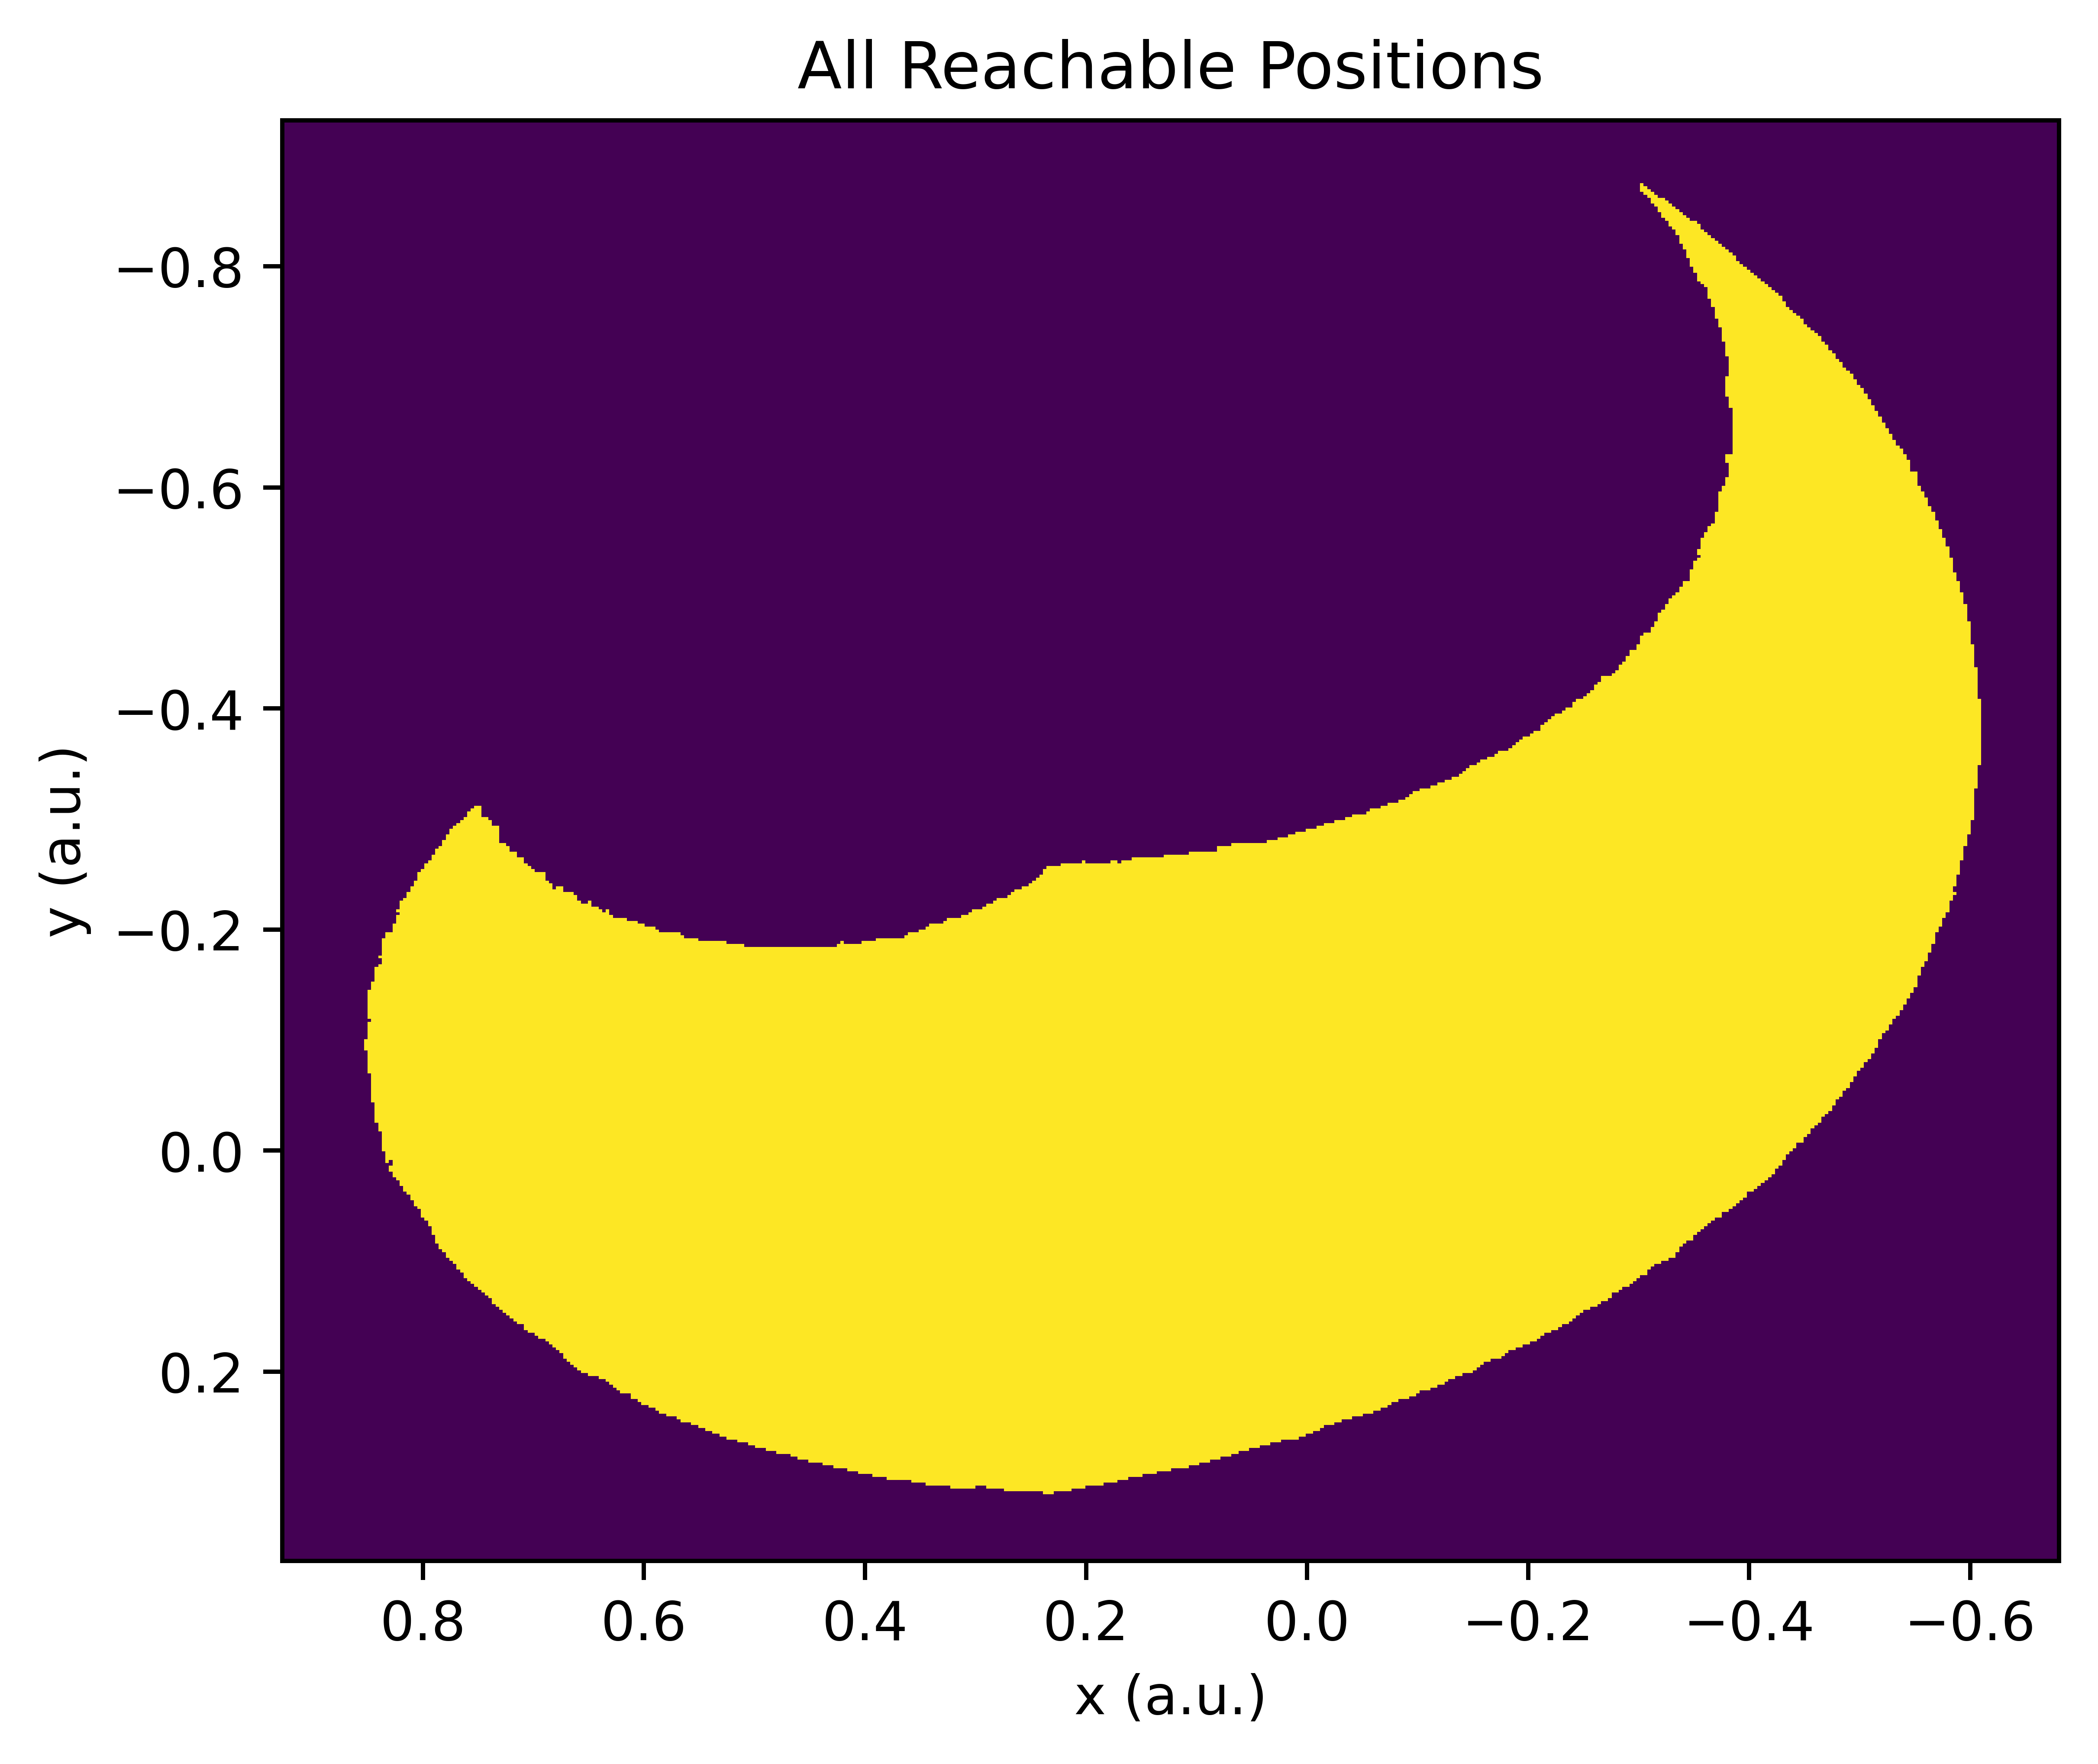

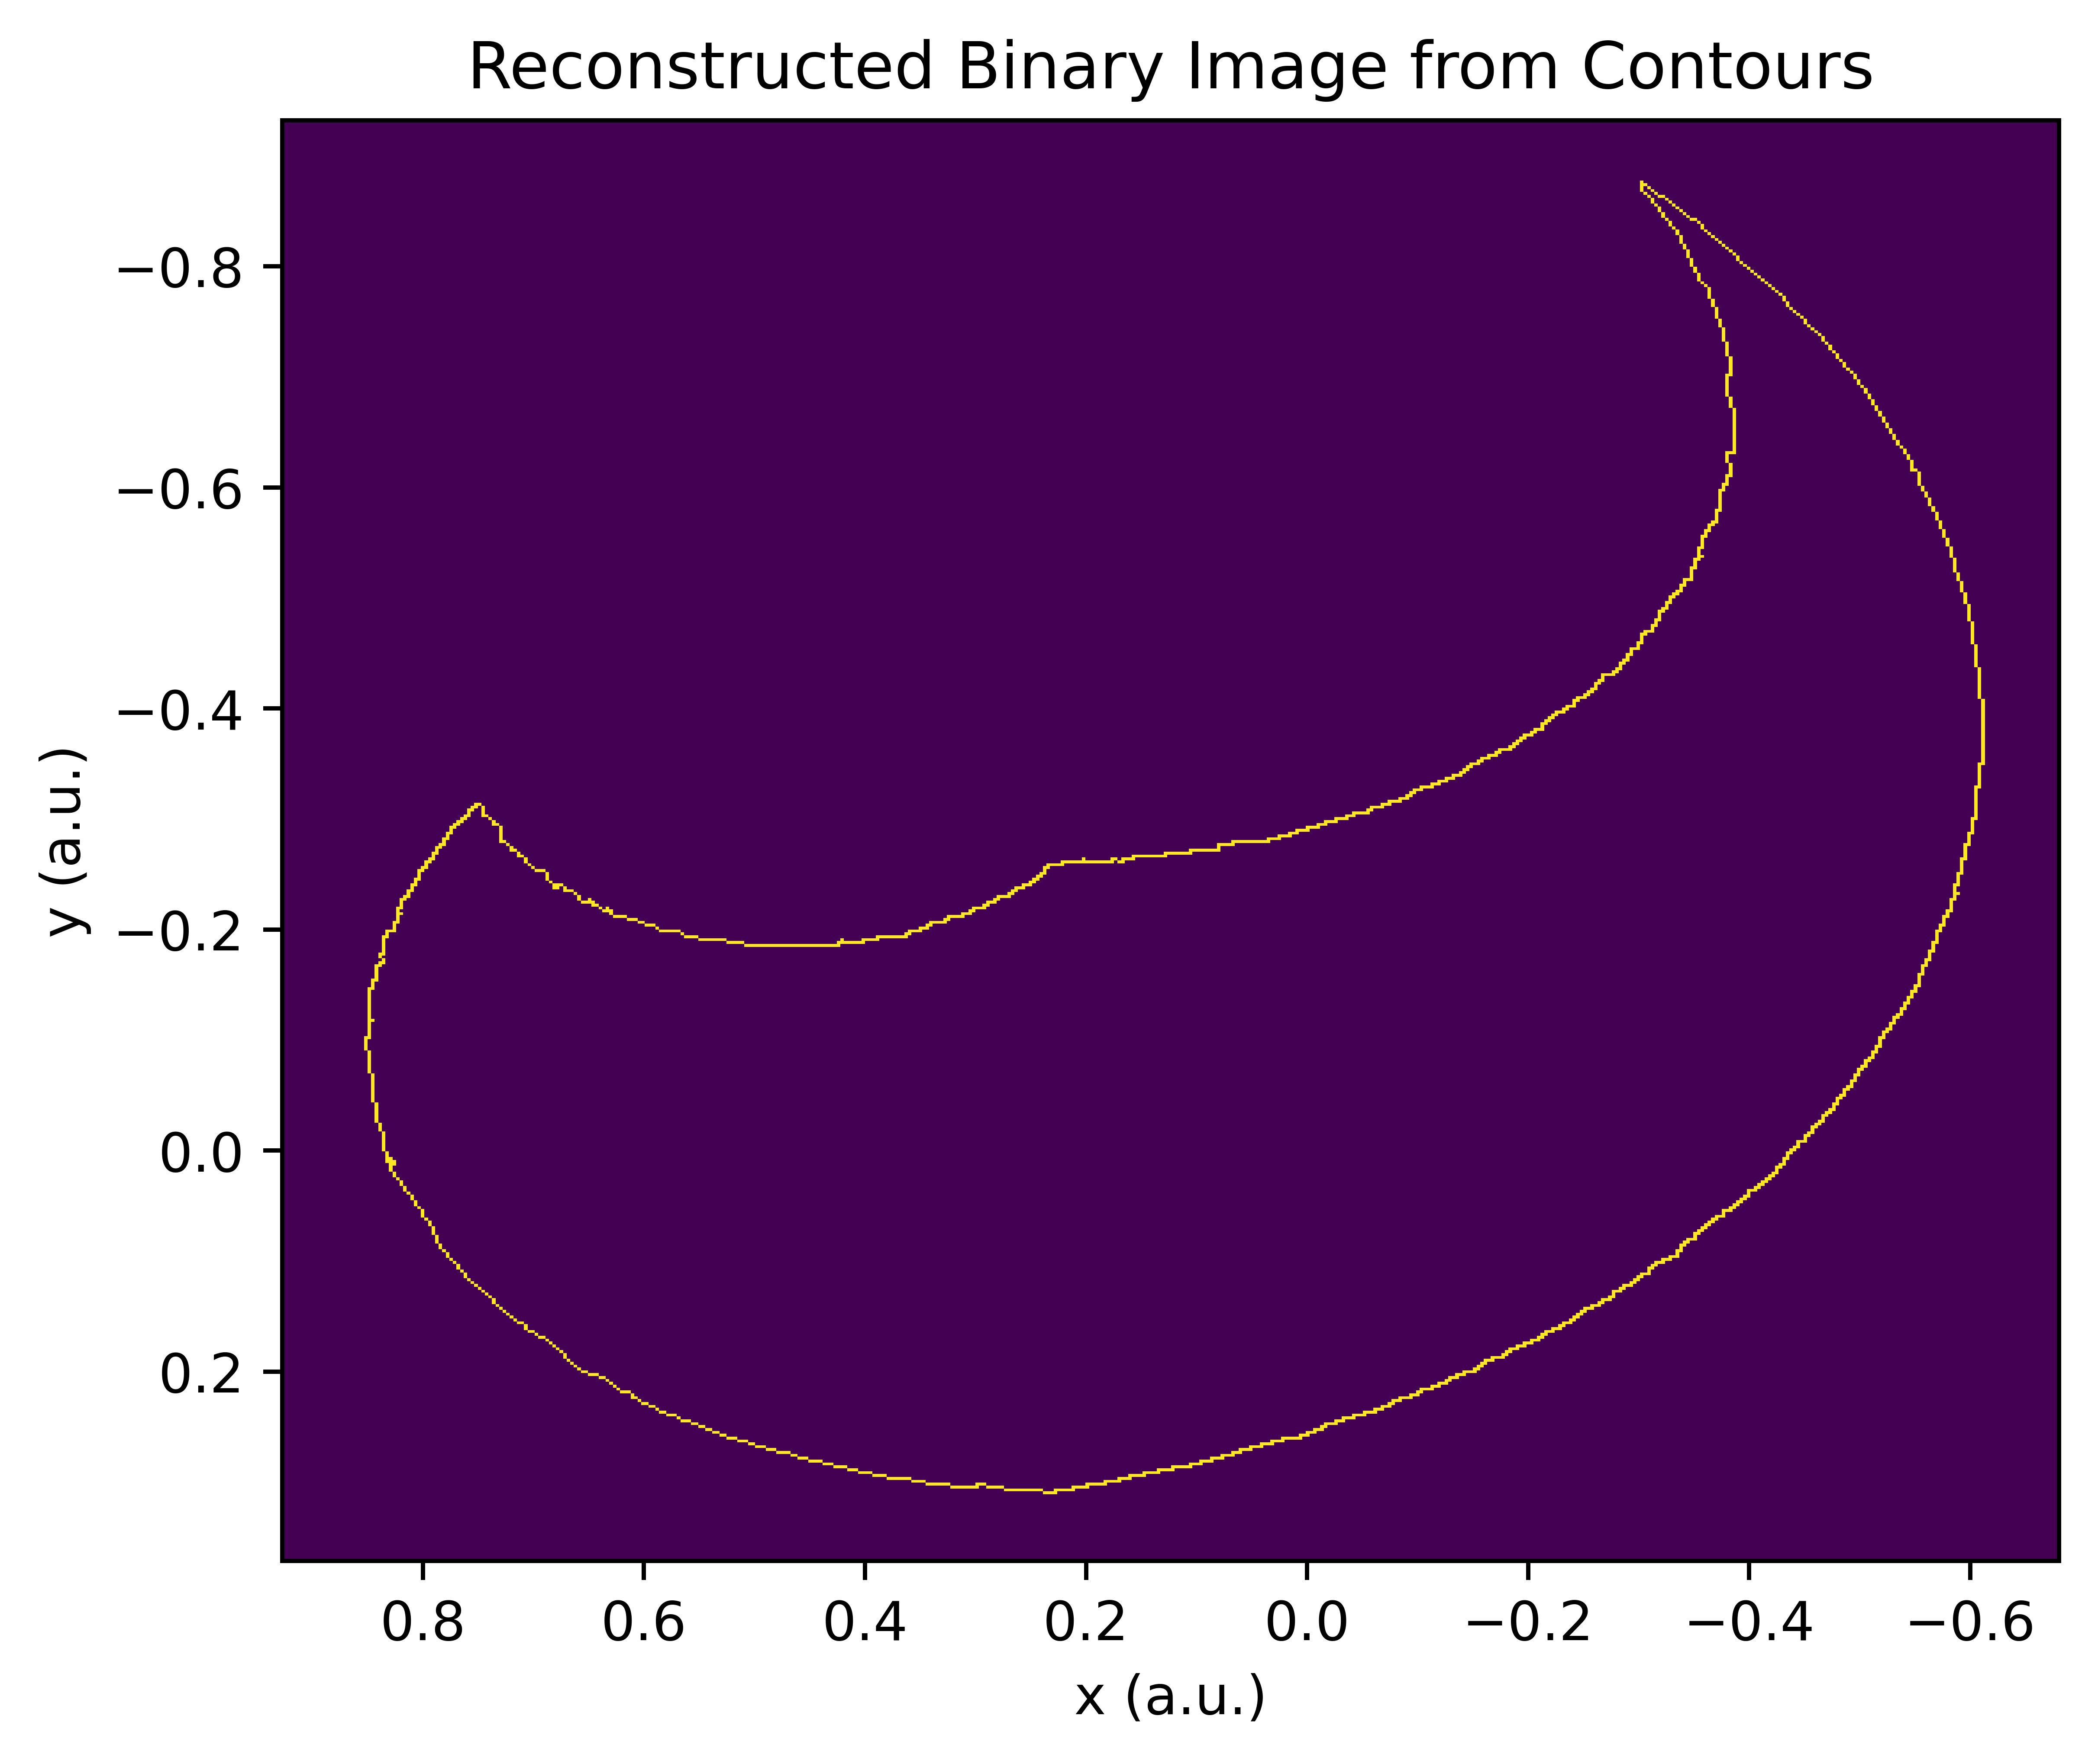

Fraction of pixels to zero out: 0.98


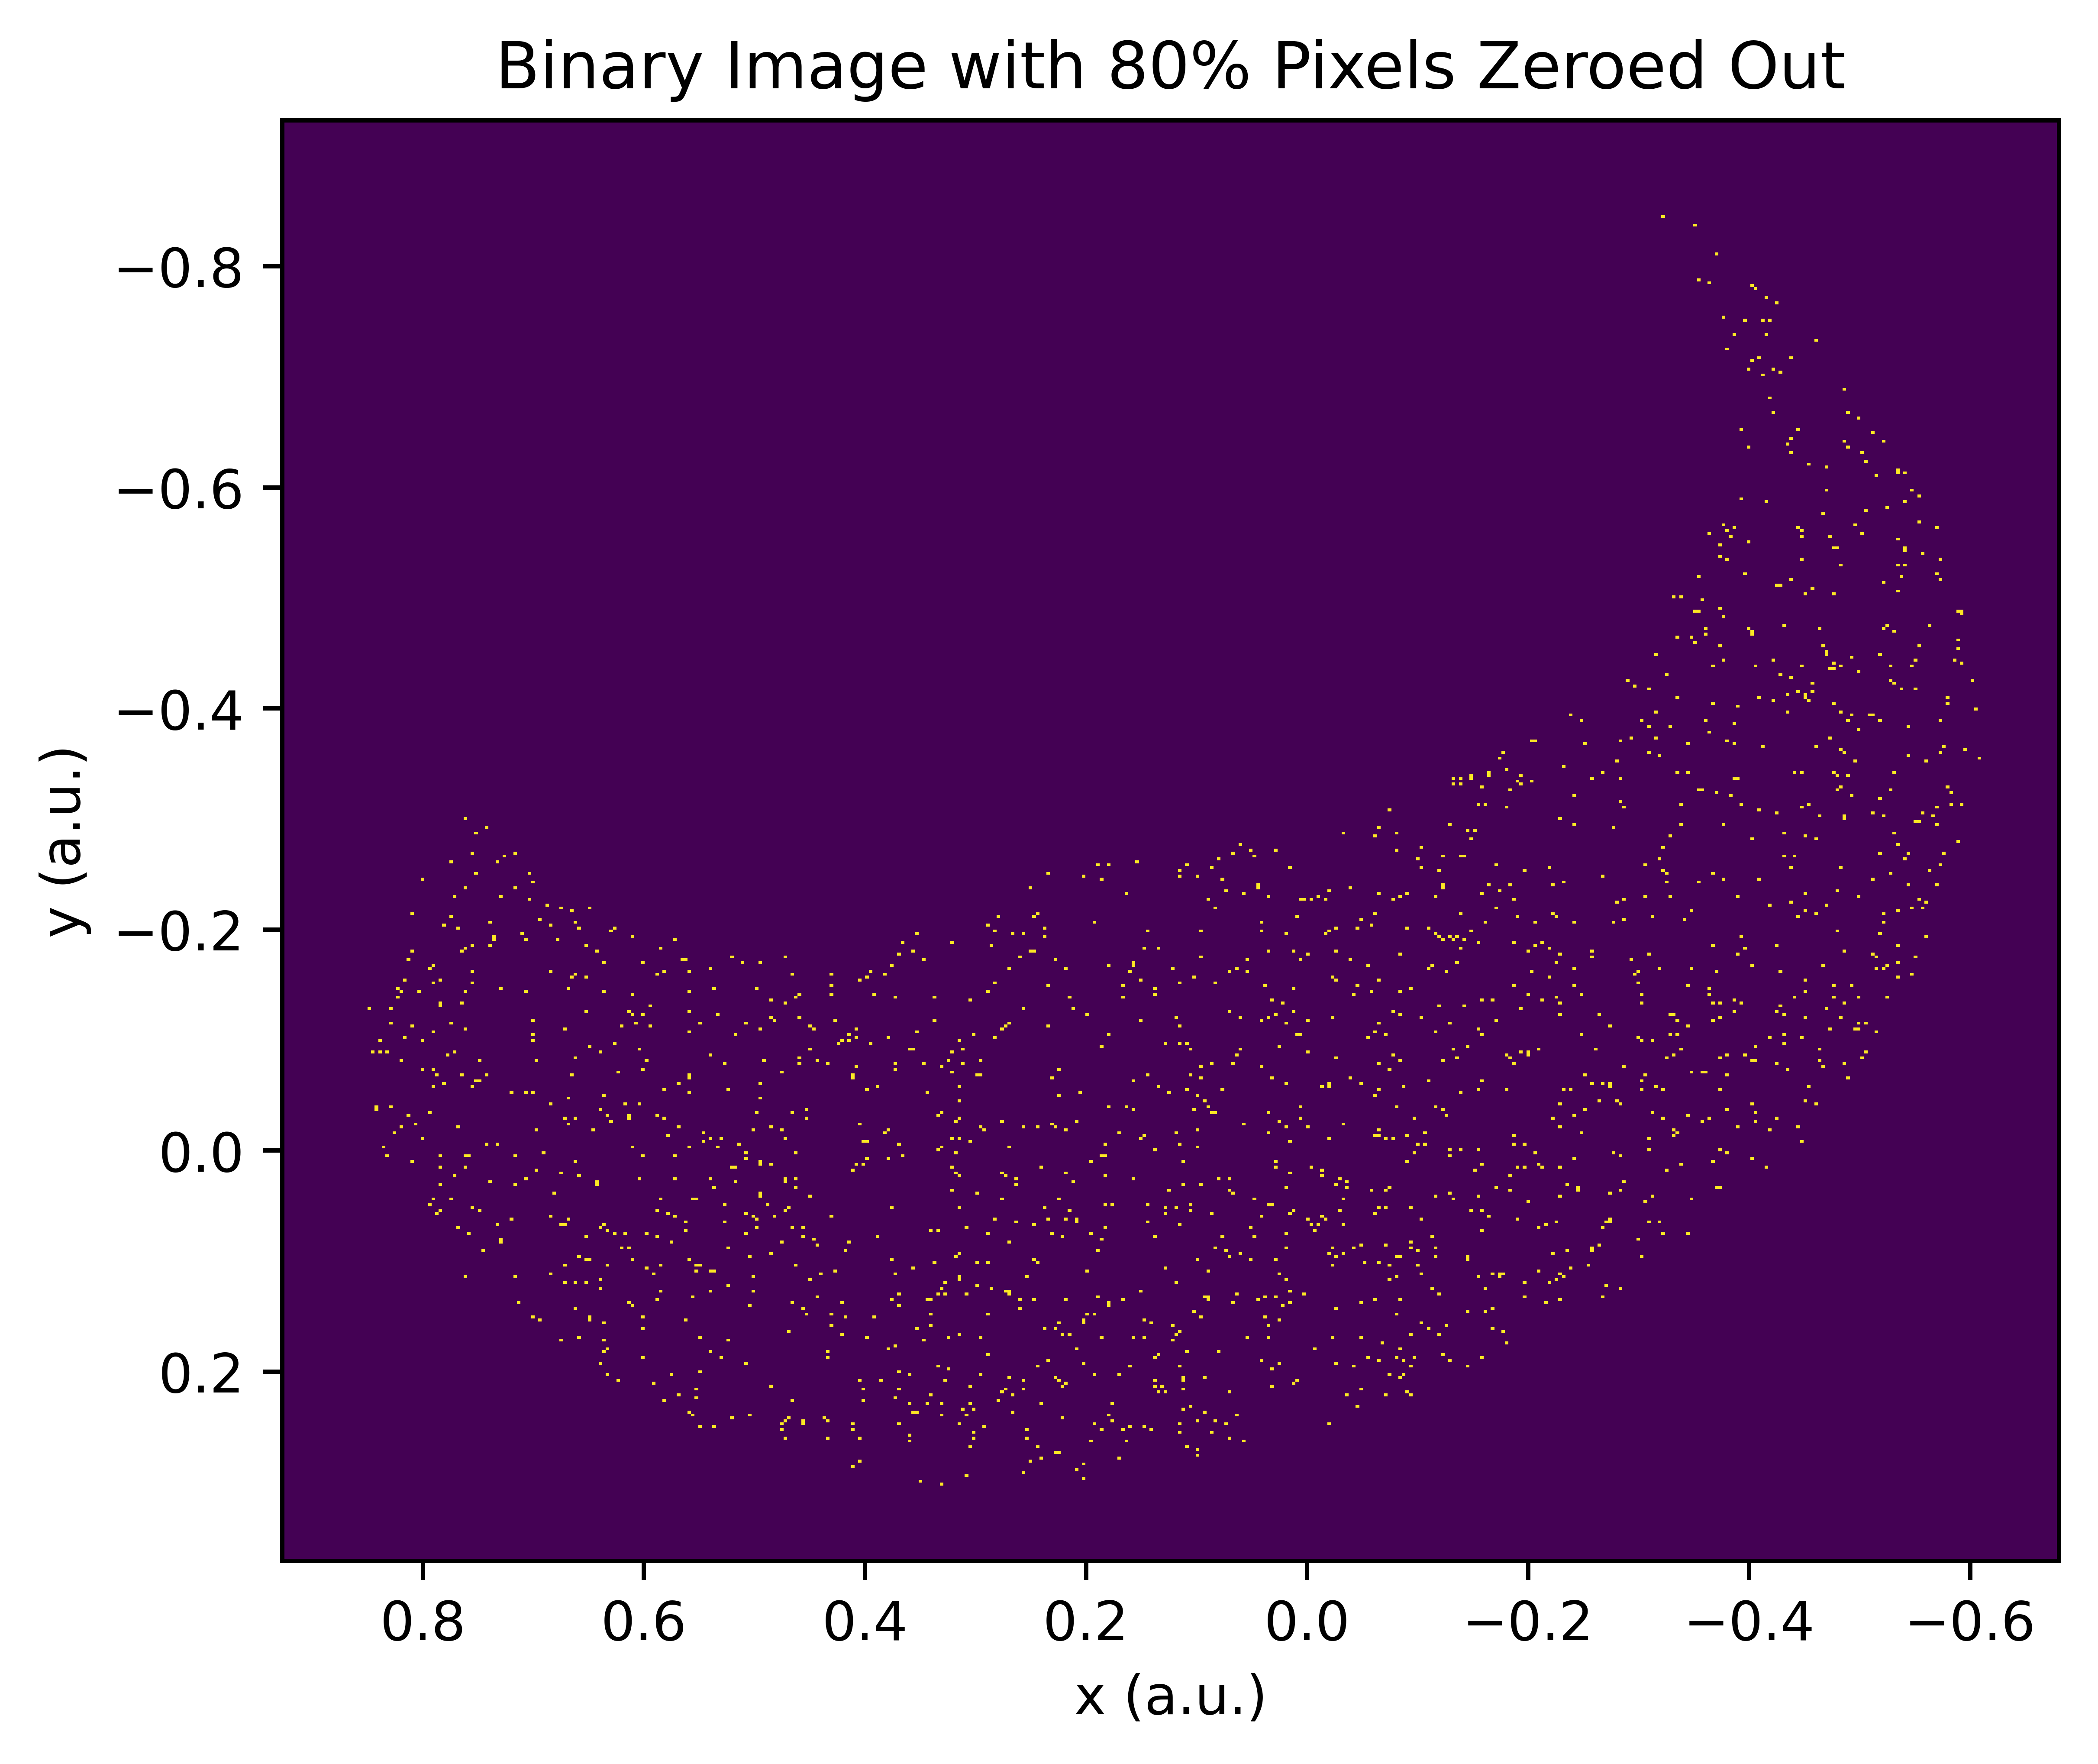

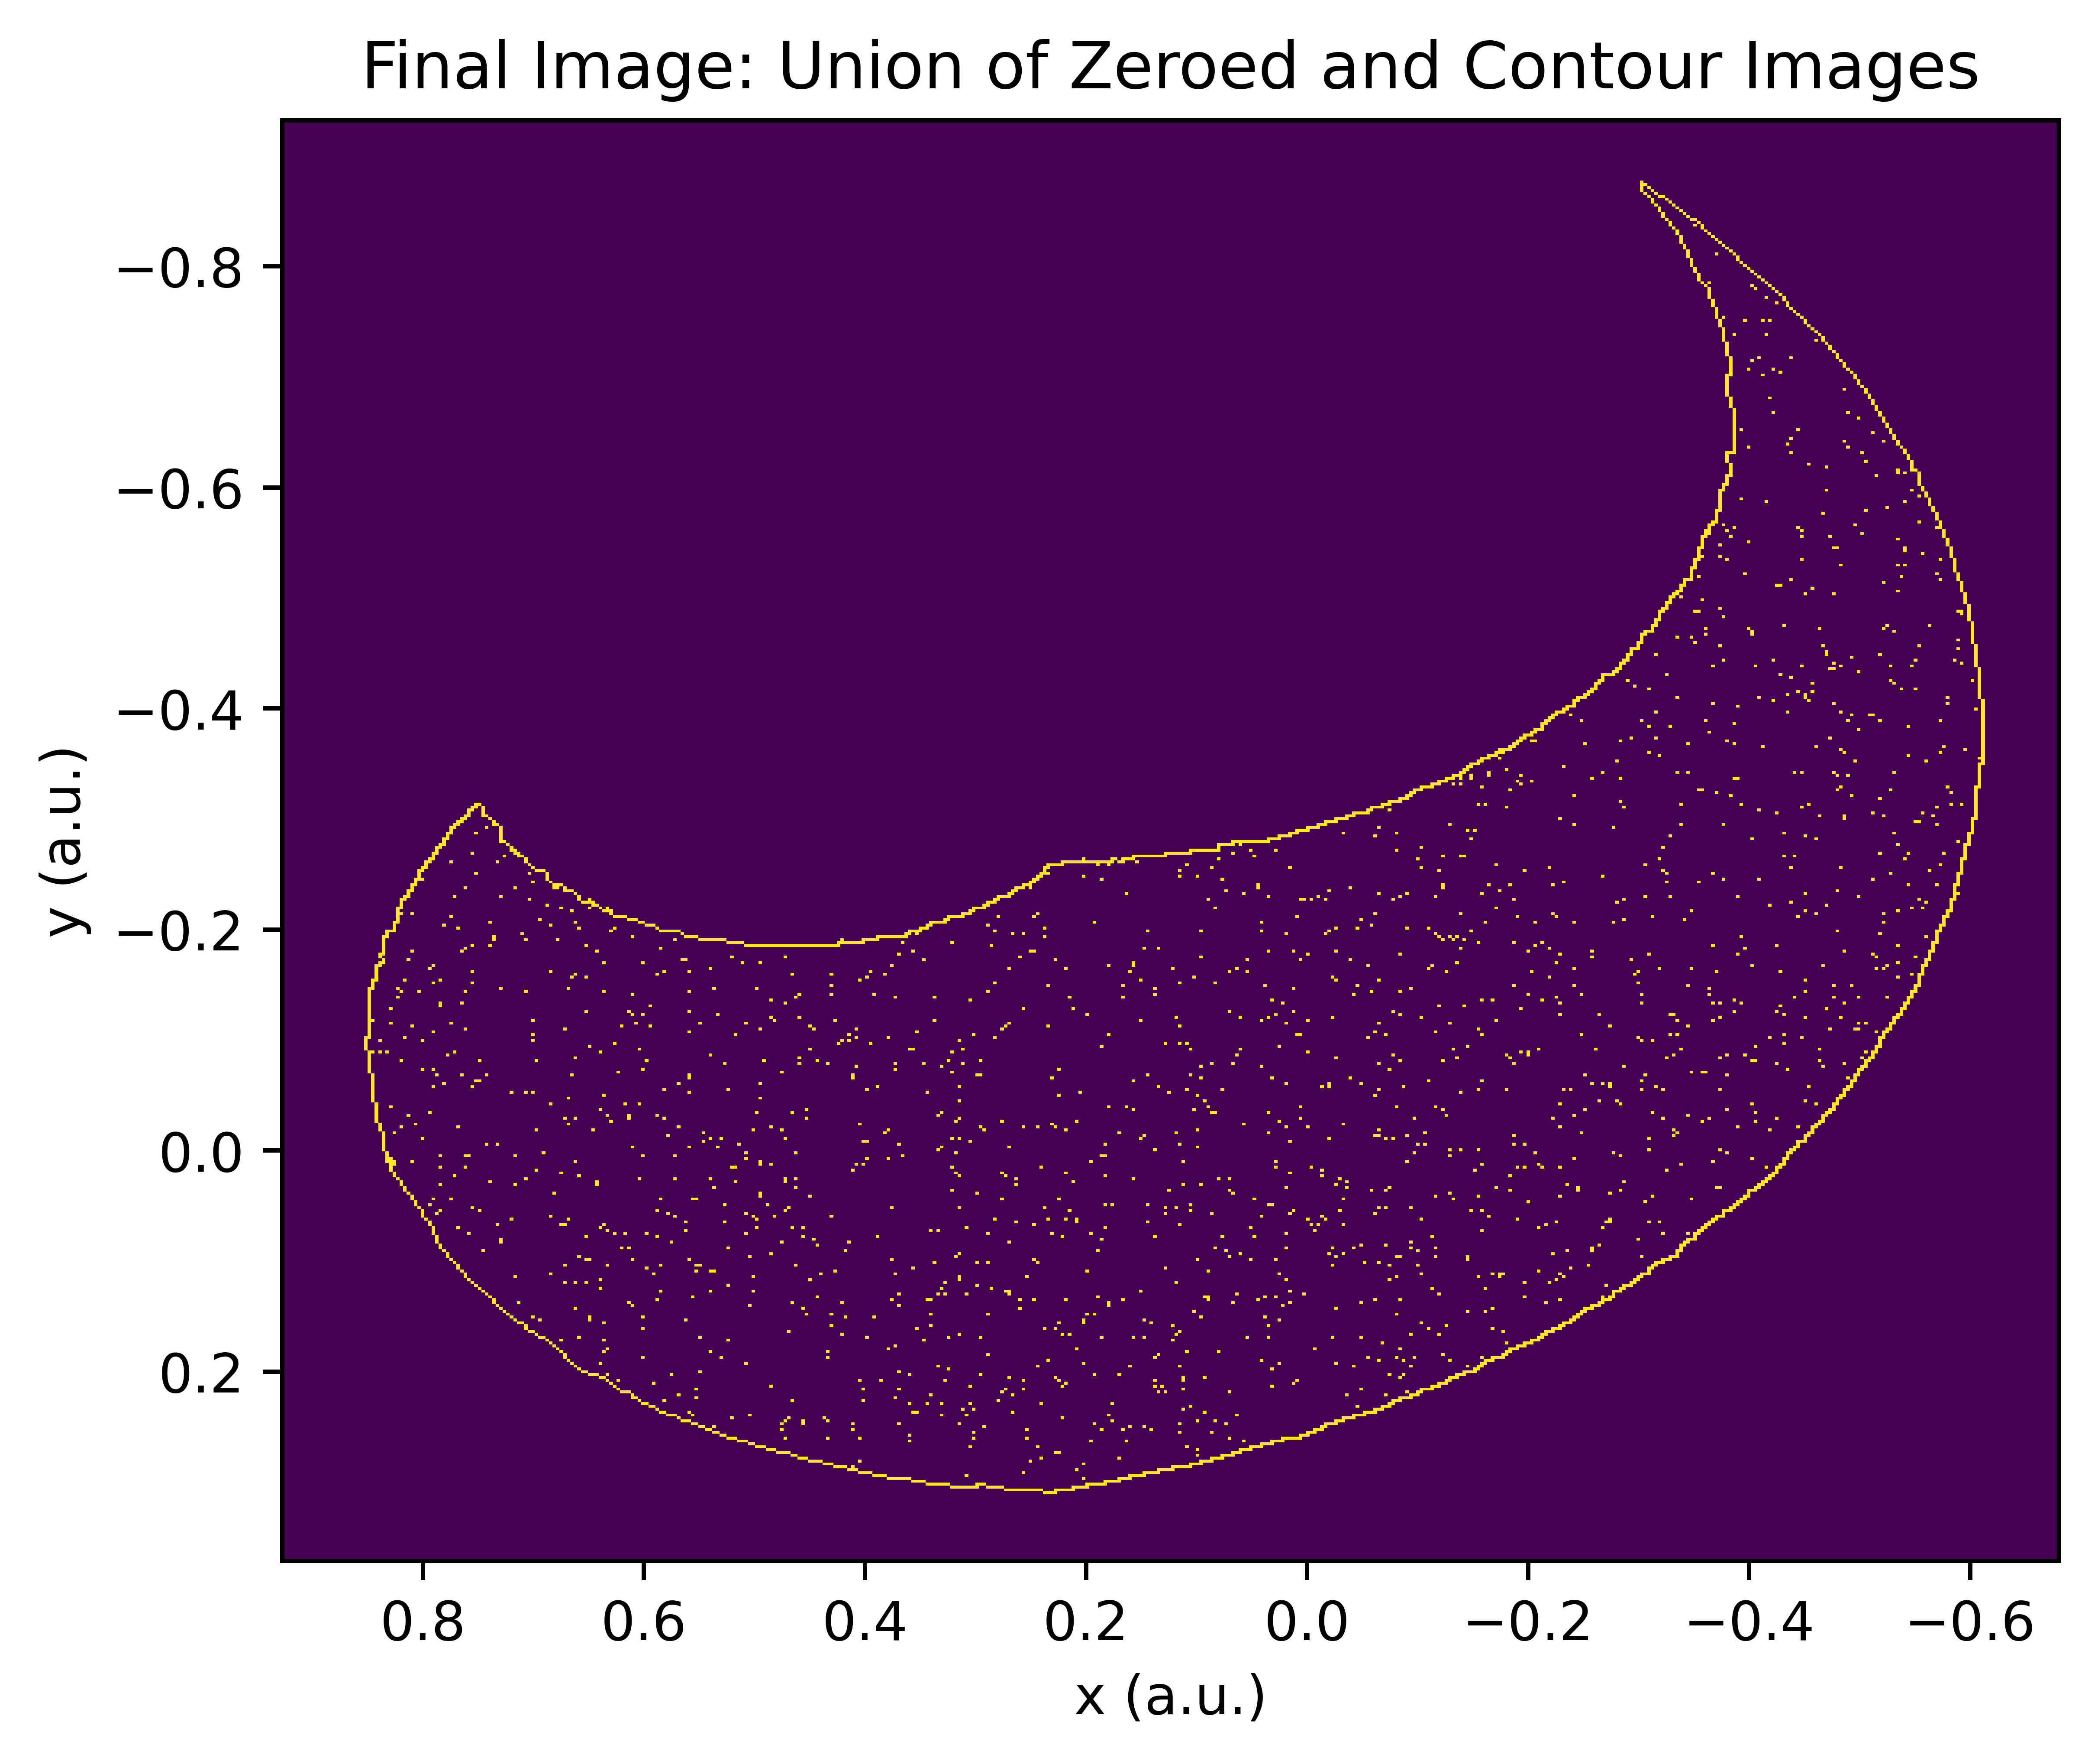

             x         y  z
0    -0.611392 -0.625793  0
1    -0.608176 -0.628399  0
2    -0.608176 -0.625793  0
3    -0.604961 -0.631005  0
4    -0.604961 -0.625793  0
...        ...       ... ..
3524  0.848474 -0.159315  0
3525  0.851690 -0.195799  0
3526  0.851690 -0.193193  0
3527  0.851690 -0.190587  0
3528  0.851690 -0.187981  0

[3529 rows x 3 columns]
              x         y  z
0     -0.608176 -0.625793  0
1     -0.604961 -0.628399  0
2     -0.604961 -0.625793  0
3     -0.601745 -0.631005  0
4     -0.601745 -0.628399  0
...         ...       ... ..
89832  0.848474 -0.161921  0
89833  0.848474 -0.159315  0
89834  0.851690 -0.193193  0
89835  0.851690 -0.190587  0
89836  0.851690 -0.187981  0

[89837 rows x 3 columns]


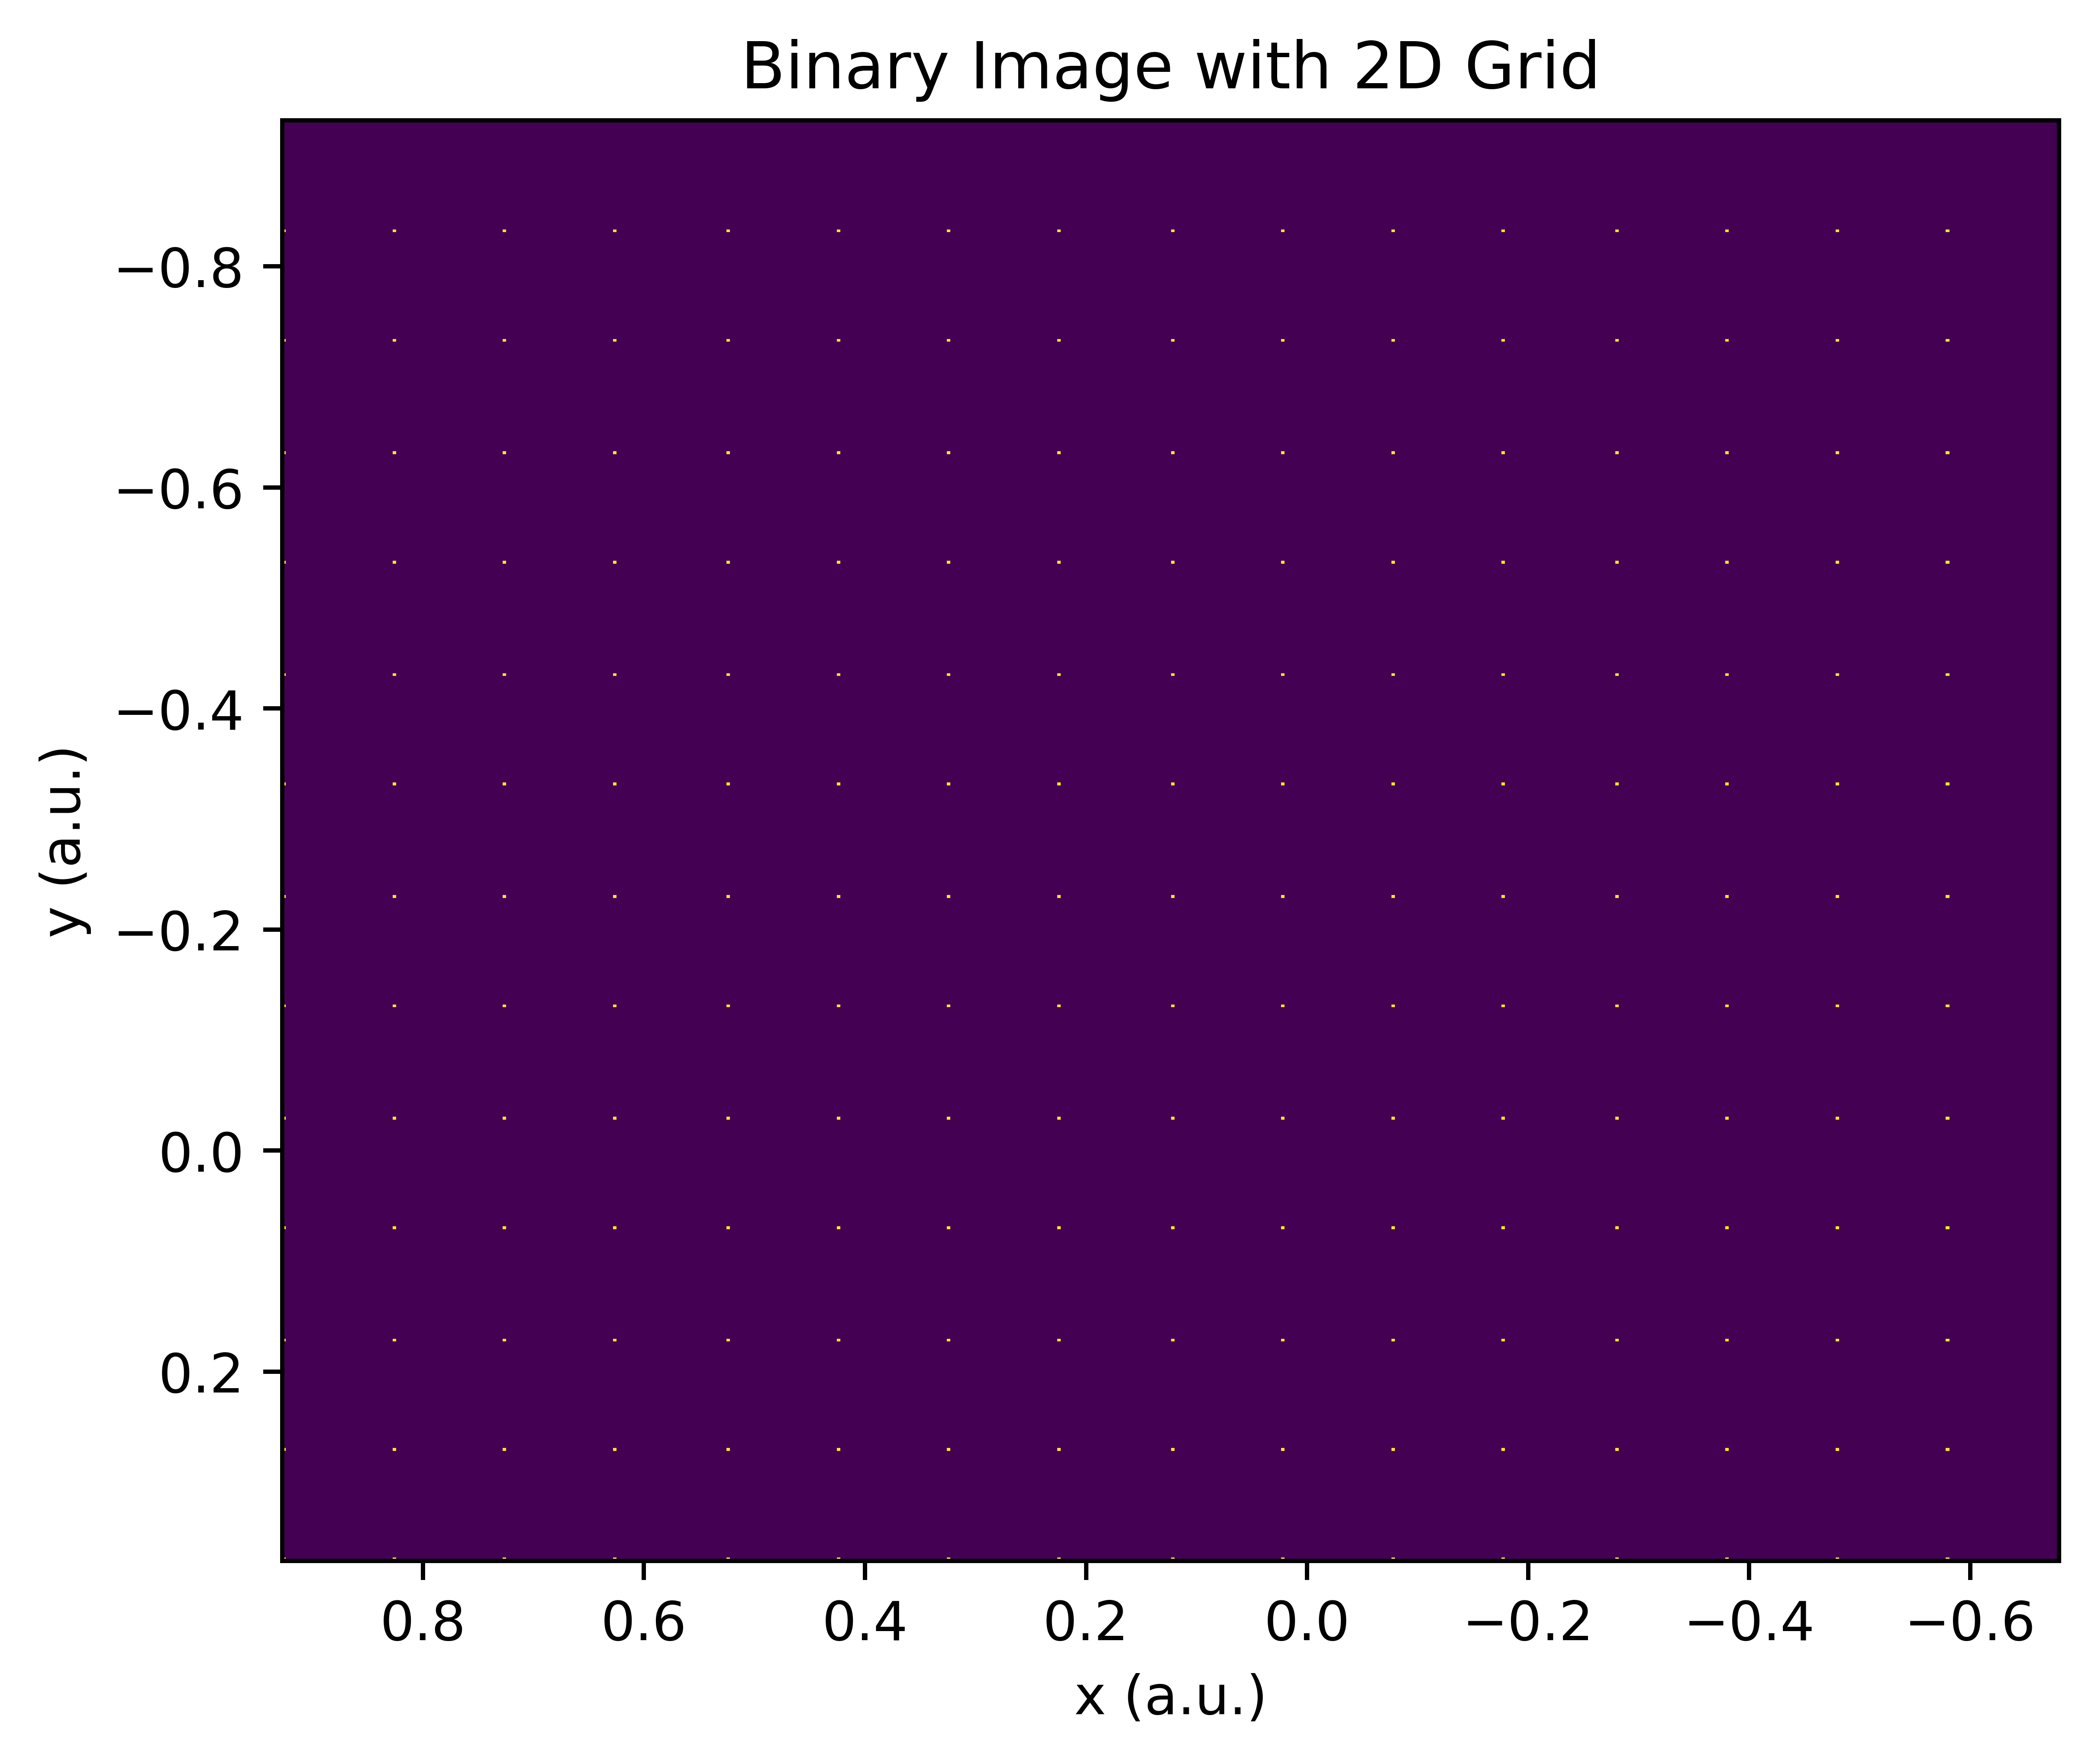

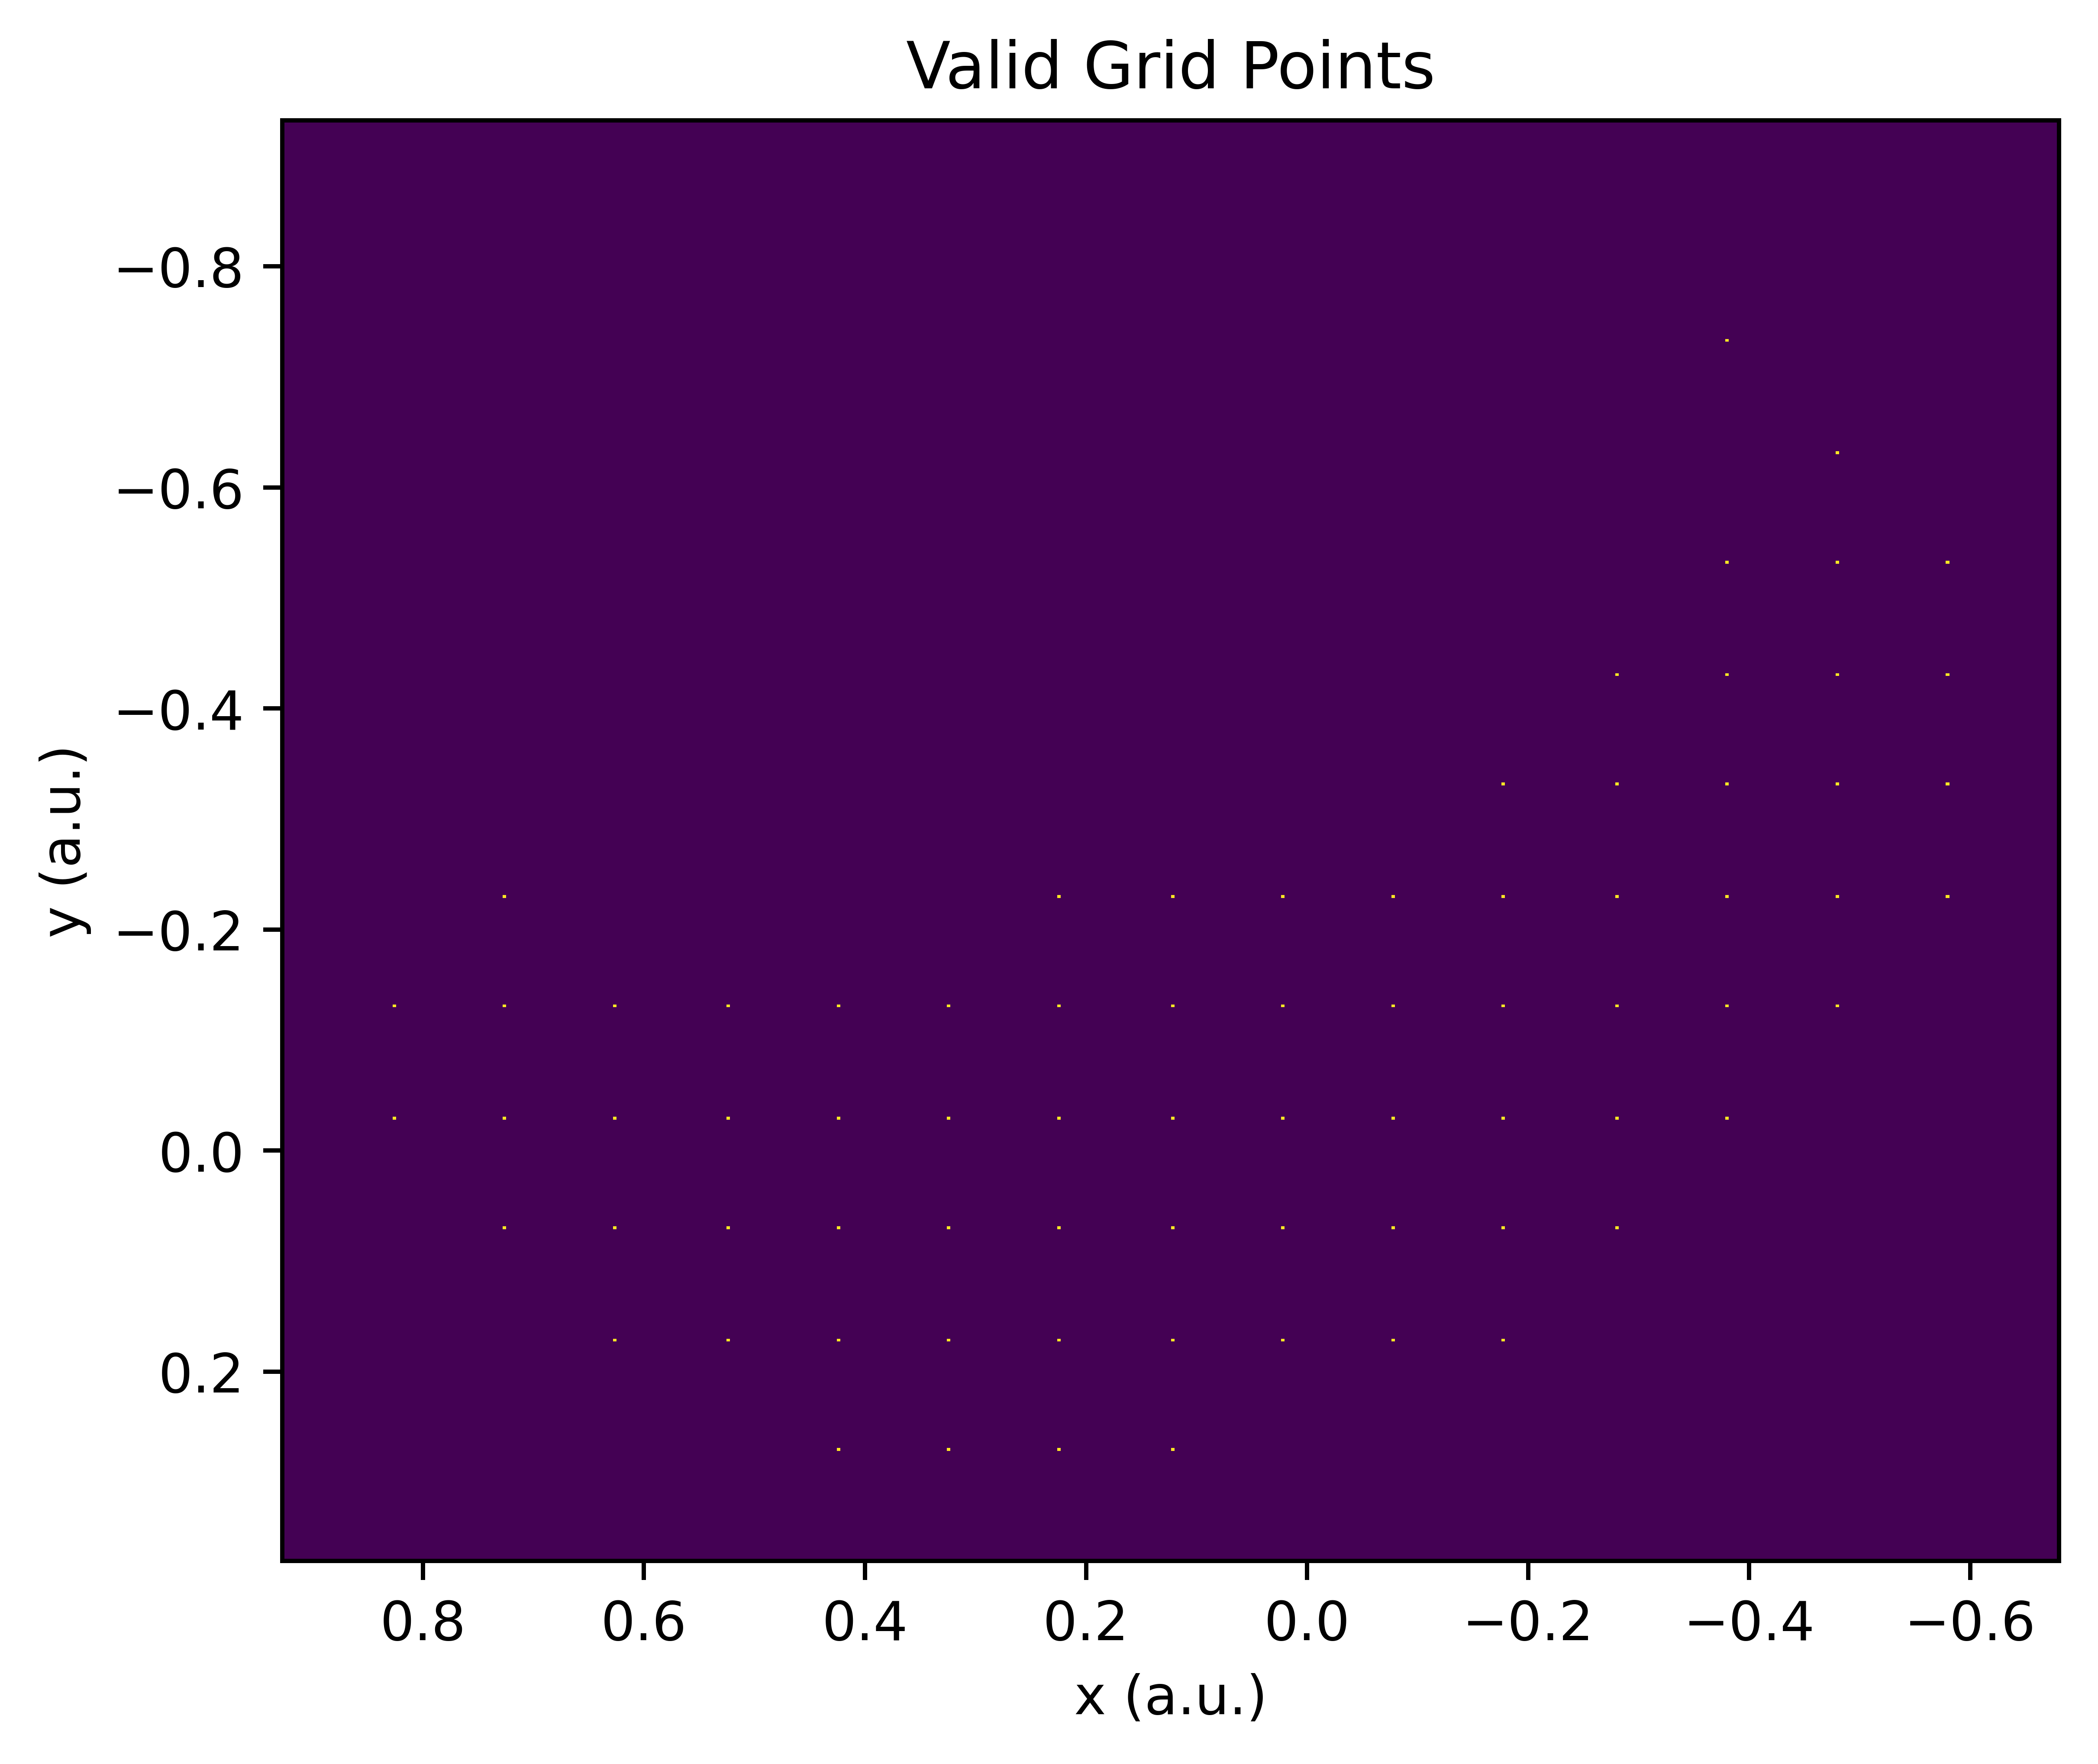

           x         y  z
0  -0.434536 -0.688338  0
1  -0.309129 -0.769124  0
2  -0.186937 -0.849911  0
3  -0.186937 -0.769124  0
4  -0.186937 -0.688338  0
..       ...       ... ..
70  0.681265  0.127347  0
71  0.803457 -0.281798  0
72  0.803457 -0.198405  0
73  0.803457 -0.117619  0
74  0.803457 -0.036832  0

[75 rows x 3 columns]


In [24]:
# %%
"""
.########..##........#######..########
.##.....##.##.......##.....##....##...
.##.....##.##.......##.....##....##...
.########..##.......##.....##....##...
.##........##.......##.....##....##...
.##........##.......##.....##....##...
.##........########..#######.....##...
"""

# Plot data
fig, axes = plt.subplots(2, 2)

# Determine the index up to which to plot
dur2plot = min(10, dur2run)
idcs2plot = np.searchsorted(time_data, dur2plot)

# Length
axes[0, 0].plot(
    time_data[:idcs2plot], sensor_data["deltoid_length"][:idcs2plot], label="Deltoid"
)
axes[0, 0].plot(
    time_data[:idcs2plot],
    sensor_data["latissimus_length"][:idcs2plot],
    label="Latissimus",
)
axes[0, 0].plot(
    time_data[:idcs2plot], sensor_data["biceps_length"][:idcs2plot], label="Biceps"
)
axes[0, 0].plot(
    time_data[:idcs2plot], sensor_data["triceps_length"][:idcs2plot], label="Triceps"
)
axes[0, 0].legend()
axes[0, 0].set_title("Length")
axes[0, 0].set_xlabel("Time (s)")
axes[0, 0].set_ylabel("Length (a.u.)")

# Velocity
axes[0, 1].plot(
    time_data[:idcs2plot], sensor_data["deltoid_velocity"][:idcs2plot], label="Deltoid"
)
axes[0, 1].plot(
    time_data[:idcs2plot],
    sensor_data["latissimus_velocity"][:idcs2plot],
    label="Latissimus",
)
axes[0, 1].plot(
    time_data[:idcs2plot], sensor_data["biceps_velocity"][:idcs2plot], label="Biceps"
)
axes[0, 1].plot(
    time_data[:idcs2plot], sensor_data["triceps_velocity"][:idcs2plot], label="Triceps"
)
axes[0, 1].legend()
axes[0, 1].set_title("Velocity")
axes[0, 1].set_xlabel("Time (s)")
axes[0, 1].set_ylabel("Velocity (a.u.)")

# Force
axes[1, 0].plot(
    time_data[:idcs2plot], sensor_data["deltoid_force"][:idcs2plot], label="Deltoid"
)
axes[1, 0].plot(
    time_data[:idcs2plot],
    sensor_data["latissimus_force"][:idcs2plot],
    label="Latissimus",
)
axes[1, 0].plot(
    time_data[:idcs2plot], sensor_data["biceps_force"][:idcs2plot], label="Biceps"
)
axes[1, 0].plot(
    time_data[:idcs2plot], sensor_data["triceps_force"][:idcs2plot], label="Triceps"
)
axes[1, 0].legend()
axes[1, 0].set_title("Force")
axes[1, 0].set_xlabel("Time (s)")
axes[1, 0].set_ylabel("Force (a.u.)")

# Position
axes[1, 1].plot(
    hand_position_data["x"][:idcs2plot],
    hand_position_data["y"][:idcs2plot],
    color="black",
    marker=".",
    markersize=0.1,
)
axes[1, 1].set_title("Hand position")
axes[1, 1].set_xlabel("x (a.u.)")
axes[1, 1].set_ylabel("y (a.u.)")

plt.tight_layout()
plt.show()

# %%
"""
..######..########....###....########..######.
.##....##....##......##.##......##....##....##
.##..........##.....##...##.....##....##......
..######.....##....##.....##....##.....######.
.......##....##....#########....##..........##
.##....##....##....##.....##....##....##....##
..######.....##....##.....##....##.....######.
"""

# Convert sensor_data and hand_position_data to pandas DataFrames
sensor_df = pd.DataFrame(sensor_data)
hand_position_df = pd.DataFrame(hand_position_data)

# Compute statistics
sensor_stats_df = pd.DataFrame(
    {
        "min": sensor_df.min(),
        "max": sensor_df.max(),
        "mean": sensor_df.mean(),
        "std": sensor_df.std(),
    }
)

hand_position_stats_df = pd.DataFrame(
    {
        "min": hand_position_df.min(),
        "max": hand_position_df.max(),
        "mean": hand_position_df.mean(),
        "std": hand_position_df.std(),
    }
)

print(sensor_stats_df)
print(hand_position_stats_df)

# %%
"""
.########..########....###.....######..##.....##
.##.....##.##.........##.##...##....##.##.....##
.##.....##.##........##...##..##.......##.....##
.########..######...##.....##.##.......#########
.##...##...##.......#########.##.......##.....##
.##....##..##.......##.....##.##....##.##.....##
.##.....##.########.##.....##..######..##.....##
"""
x, y = hand_position_data["x"], hand_position_data["y"]
x_min, x_max = min(x), max(x)
x_min = x_min - 0.05 * (x_max - x_min)
x_max = x_max + 0.05 * (x_max - x_min)
y_min, y_max = min(y), max(y)
y_min = y_min - 0.05 * (y_max - y_min)
y_max = y_max + 0.05 * (y_max - y_min)
counts2d, x_edges, y_edges = np.histogram2d(
    x,
    y,
    bins=500,
    range=[
        [x_min, x_max],
        [y_min, y_max],
    ],
)

plt.figure()
plt.imshow(
    counts2d, extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]), origin="lower"
)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

reachable_image = counts2d > 0
reachable_image = binary_fill_holes(reachable_image)

plt.figure()
plt.imshow(
    reachable_image,
    extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]),
    origin="lower",
)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("All Reachable Positions")
plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.show()

# Find contours of the binary image
contours = measure.find_contours(reachable_image, level=0.5)

# Create a blank binary image (same shape)
contours_image = np.zeros_like(reachable_image, dtype=bool)

# Draw contours on the blank image
for contour in contours:

    # Round coordinates and convert to integer indices
    rr, cc = contour[:, 0].astype(int), contour[:, 1].astype(int)

    # Clip to stay within image bounds
    rr = np.clip(rr, 0, contours_image.shape[0] - 1)
    cc = np.clip(cc, 0, contours_image.shape[1] - 1)

    contours_image[rr, cc] = True

# Plot the reconstructed binary image
plt.figure()
plt.imshow(
    contours_image,
    extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]),
    origin="lower",
)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Reconstructed Binary Image from Contours")
plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.show()

num_countour_pixels = contours_image.astype(int).sum()
num_reachable_pixels = reachable_image.astype(int).sum()
fraction_to_zero_out = 1 - num_countour_pixels / (
    num_reachable_pixels - num_countour_pixels
)
print(f"Fraction of pixels to zero out: {fraction_to_zero_out:.2f}")

# Zero out a fraction of the pixels in the binary image
zeroed_image = reachable_image.copy()
num_pixels = zeroed_image.size
num_zeroed = int(fraction_to_zero_out * num_pixels)

# Randomly select indices to zero out
zero_indices = np.random.choice(num_pixels, num_zeroed, replace=False)
flat_image = zeroed_image.flatten()
flat_image[zero_indices] = 0
zeroed_image = flat_image.reshape(zeroed_image.shape)

# Plot the zeroed-out binary image
plt.figure()
plt.imshow(
    zeroed_image,
    extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]),
    origin="lower",
)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Binary Image with 80% Pixels Zeroed Out")
plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.show()

# Compute the union of zeroed_image and contour_image
candidate_targets_image = np.logical_or(zeroed_image, contours_image)

# Plot the final image
plt.figure()
plt.imshow(
    candidate_targets_image,
    extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]),
    origin="lower",
)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Final Image: Union of Zeroed and Contour Images")
plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.show()

candidate_idcs = np.argwhere(candidate_targets_image)
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2
candidate_targets = [(x_centers[i], y_centers[j], 0) for i, j in candidate_idcs]
candidate_targets_df = pd.DataFrame(candidate_targets, columns=["x", "y", "z"])

print(candidate_targets_df)

reachable_idcs = np.argwhere(reachable_image)
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2
reachable_positions = [(x_centers[i], y_centers[j], 0) for i, j in reachable_idcs]
reachable_positions_df = pd.DataFrame(reachable_positions, columns=["x", "y", "z"])

print(reachable_positions_df)

# %%
"""
..#######..########......######...########..####.########.
.##.....##.##.....##....##....##..##.....##..##..##.....##
........##.##.....##....##........##.....##..##..##.....##
..#######..##.....##....##...####.########...##..##.....##
.##........##.....##....##....##..##...##....##..##.....##
.##........##.....##....##....##..##....##...##..##.....##
.#########.########......######...##.....##.####.########.
"""

# Create a binary image with a 2D grid of a given xy resolution
xy_resolution = 0.1  # Define the resolution
grid_image = np.zeros_like(reachable_image, dtype=bool)

# Calculate the number of grid points along each axis
x_grid_points = int((x_max - x_min) / xy_resolution) + 1
y_grid_points = int((y_max - y_min) / xy_resolution) + 1

# Generate grid points
x_grid = np.linspace(x_min, x_max, x_grid_points)
y_grid = np.linspace(y_min, y_max, y_grid_points)

# Mark grid points in the binary image
for x in x_grid:
    for y in y_grid:
        # Find the closest indices in the binary image
        x_idx = np.searchsorted(x_edges, x) - 1
        y_idx = np.searchsorted(y_edges, y) - 1

        # Ensure indices are within bounds
        if 0 <= x_idx < grid_image.shape[1] and 0 <= y_idx < grid_image.shape[0]:
            grid_image[y_idx, x_idx] = True

# Plot the grid binary image
plt.figure()
plt.imshow(
    grid_image,
    extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]),
    origin="lower",
)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Binary Image with 2D Grid")
plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.show()

reachable_grid_image = grid_image & reachable_image
plt.figure()
plt.imshow(
    reachable_grid_image,
    extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]),
    origin="lower",
)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title("Valid Grid Points")
plt.xlabel("x (a.u.)")
plt.ylabel("y (a.u.)")
plt.show()

grid_idcs = np.argwhere(reachable_grid_image)
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2
grid_positions = [(x_centers[i], y_centers[j], 0) for i, j in grid_idcs]
grid_positions_df = pd.DataFrame(grid_positions, columns=["x", "y", "z"])

print(grid_positions_df)

# %%
"""
..######.....###....##.....##.########
.##....##...##.##...##.....##.##......
.##........##...##..##.....##.##......
..######..##.....##.##.....##.######..
.......##.#########..##...##..##......
.##....##.##.....##...##.##...##......
..######..##.....##....###....########
"""
save_dir = "../../mujoco"

# Save sensor_data and hand_position_data to the mujoco folder
sensor_stats_df.to_pickle(f"{save_dir}/sensor_stats.pkl")
hand_position_stats_df.to_pickle(f"{save_dir}/hand_position_stats.pkl")

# Save reachable_positions_df to the mujoco folder
grid_positions_df.to_pickle(f"{save_dir}/grid_positions.pkl")
candidate_targets_df.to_pickle(f"{save_dir}/candidate_targets.pkl")
reachable_positions_df.to_pickle(f"{save_dir}/reachable_positions.pkl")
